**Description**:

This notebook focuses on implementing K-Means clustering using data reduced by PCA, TSNE, and UMAP techniques. It involves extensive exploratory analysis to evaluate different numbers of clusters, metrics, and feature selections to ensure robust clustering before transitioning to supervised learning. The primary focus is on utilizing only demographic attributes to train the clustering models for predicting tone preferences.

## Imports

In [93]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Non-Hierarchical Clustering Models
from sklearn.cluster import KMeans
import umap
from sklearn.manifold import TSNE

# Metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [94]:
%pip install kmodes scikit-learn-extra 



[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:
path = '../datasets/FoodInsecurity_Hispanic_Demographics_Tone_Preferences_Dataset.xlsx'

In [96]:
df = pd.read_excel(path)

In [97]:
df.columns

Index(['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
       'income', 'employment', 'language', 'disability', 'states', 'sample_1',
       'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7',
       'sample_8'],
      dtype='object')

In [175]:
demographics = df[['age', 'gender','employment']]

## Pre-processing

### Encoding

In [176]:
demographics_encoded = pd.get_dummies(demographics)

### Scaling Data

In [177]:
scaler = StandardScaler()
demographics_scaled = scaler.fit_transform(demographics_encoded)

In [183]:
demographics_encoded.to_excel('demographics_encoded.xlsx', index=False)

## PCA

In [179]:
pca = PCA(n_components=2)
demographics_pca = pca.fit_transform(demographics_encoded)

# Access the principal components
principal_components = pca.components_

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

### Elbow Method

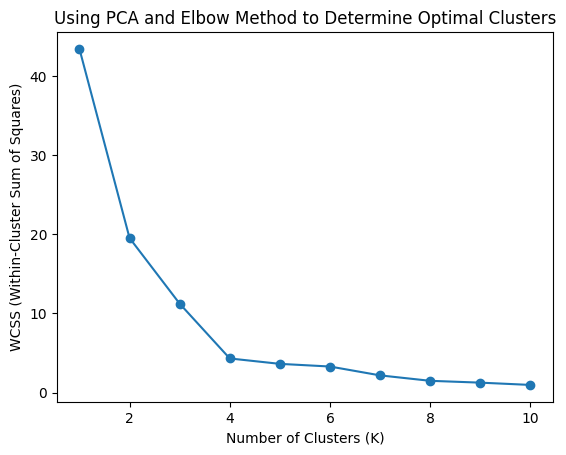

In [180]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(demographics_pca)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plotting the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Using PCA and Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

### Metrics

For n_clusters = 2, the average silhouette score is: 0.53
For n_clusters = 2, the Calinski-Harabasz index is: 58.73
For n_clusters = 2, the Davies-Bouldin score is: 0.83


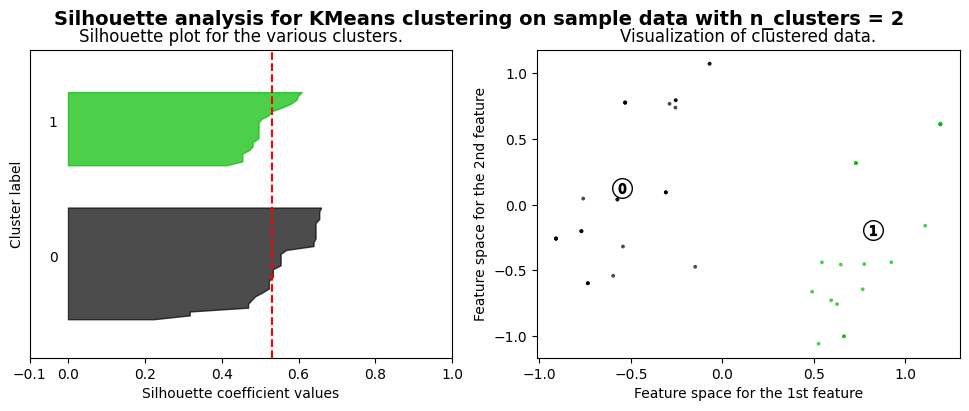

For n_clusters = 3, the average silhouette score is: 0.57
For n_clusters = 3, the Calinski-Harabasz index is: 67.32
For n_clusters = 3, the Davies-Bouldin score is: 0.58


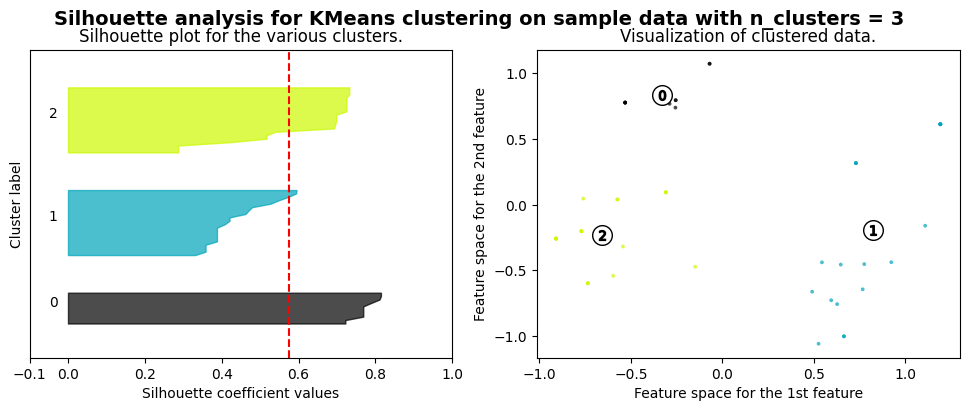

For n_clusters = 4, the average silhouette score is: 0.66
For n_clusters = 4, the Calinski-Harabasz index is: 139.11
For n_clusters = 4, the Davies-Bouldin score is: 0.45


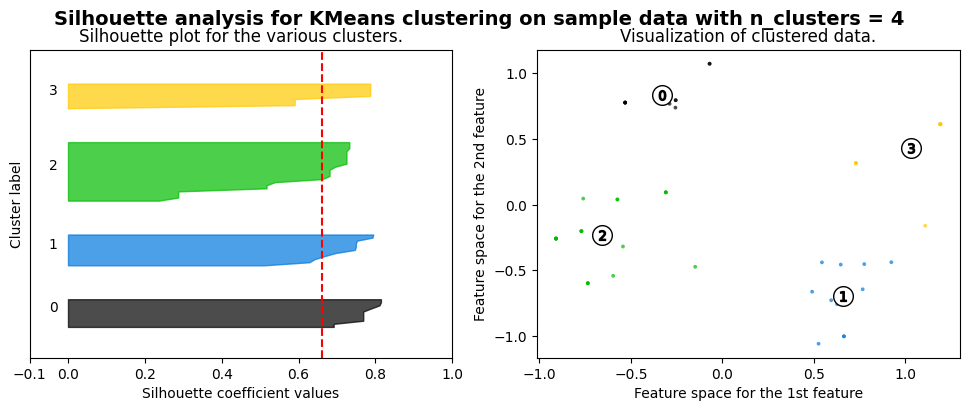

For n_clusters = 5, the average silhouette score is: 0.67
For n_clusters = 5, the Calinski-Harabasz index is: 123.38
For n_clusters = 5, the Davies-Bouldin score is: 0.46


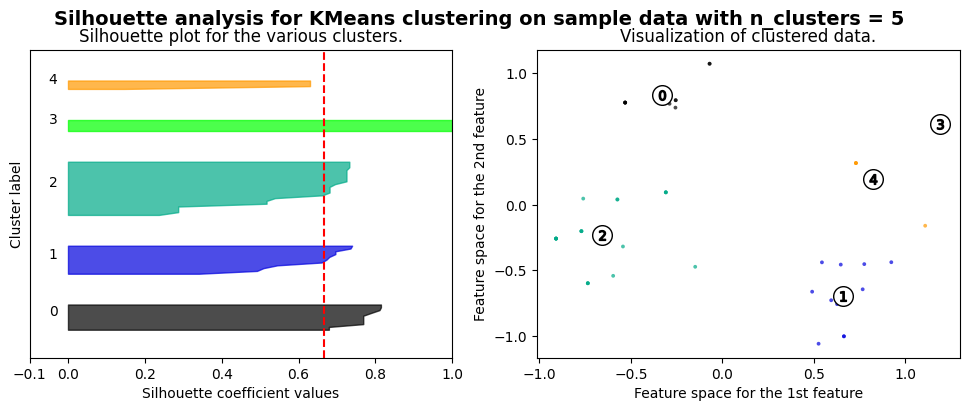

For n_clusters = 6, the average silhouette score is: 0.56
For n_clusters = 6, the Calinski-Harabasz index is: 107.29
For n_clusters = 6, the Davies-Bouldin score is: 0.47


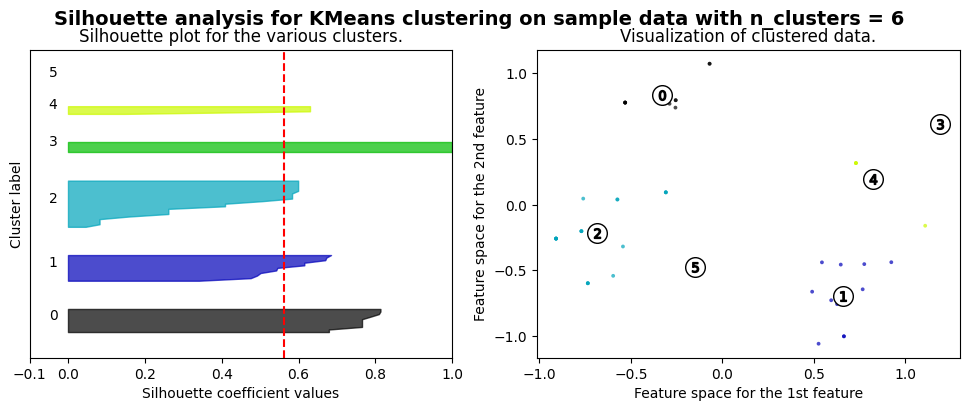

For n_clusters = 7, the average silhouette score is: 0.60
For n_clusters = 7, the Calinski-Harabasz index is: 136.05
For n_clusters = 7, the Davies-Bouldin score is: 0.51


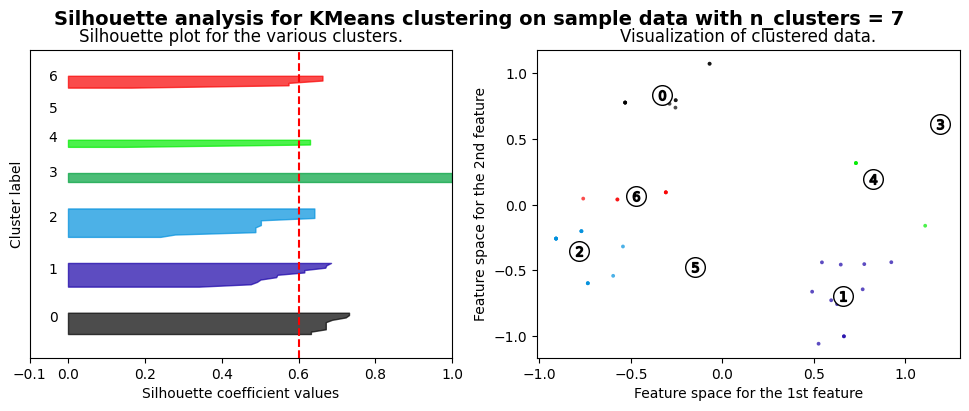

For n_clusters = 8, the average silhouette score is: 0.62
For n_clusters = 8, the Calinski-Harabasz index is: 169.30
For n_clusters = 8, the Davies-Bouldin score is: 0.54


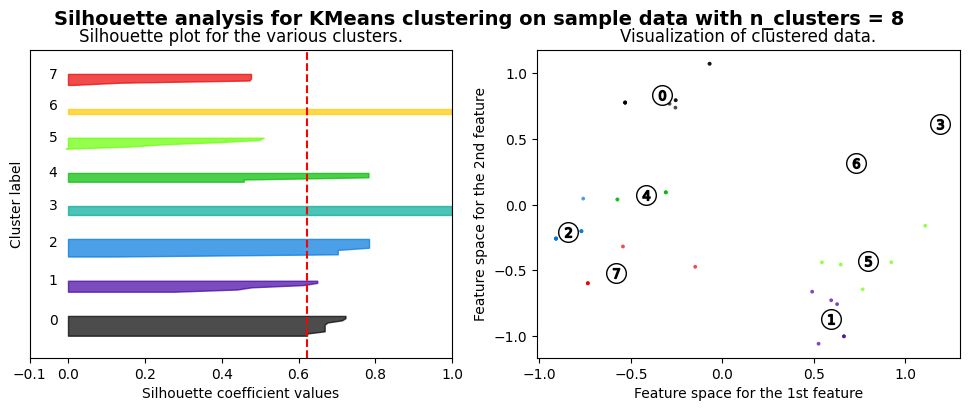

For n_clusters = 9, the average silhouette score is: 0.62
For n_clusters = 9, the Calinski-Harabasz index is: 172.27
For n_clusters = 9, the Davies-Bouldin score is: 0.55


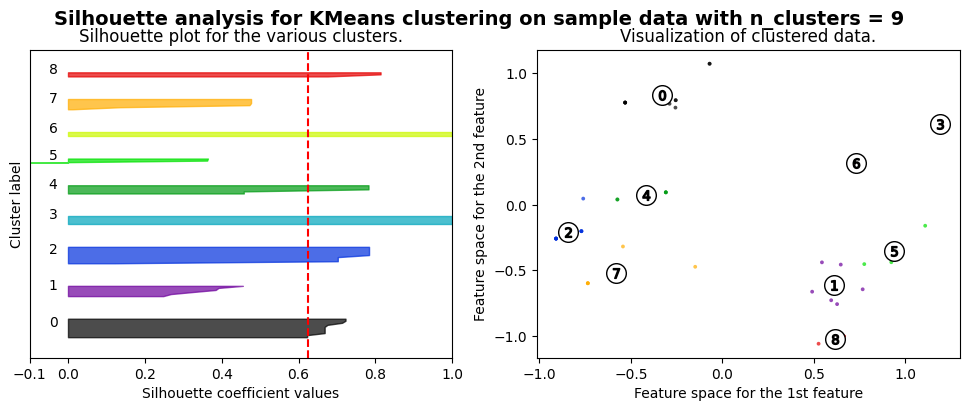

For n_clusters = 10, the average silhouette score is: 0.62
For n_clusters = 10, the Calinski-Harabasz index is: 195.20
For n_clusters = 10, the Davies-Bouldin score is: 0.54


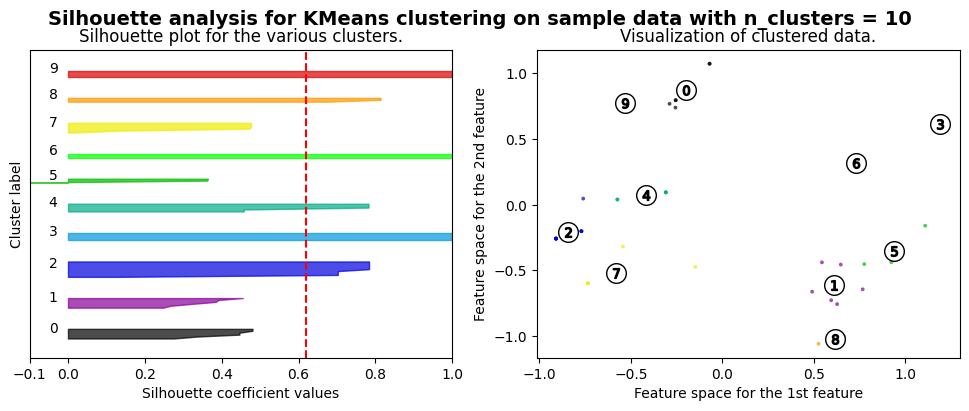

For n_clusters = 11, the average silhouette score is: 0.63
For n_clusters = 11, the Calinski-Harabasz index is: 221.58
For n_clusters = 11, the Davies-Bouldin score is: 0.56


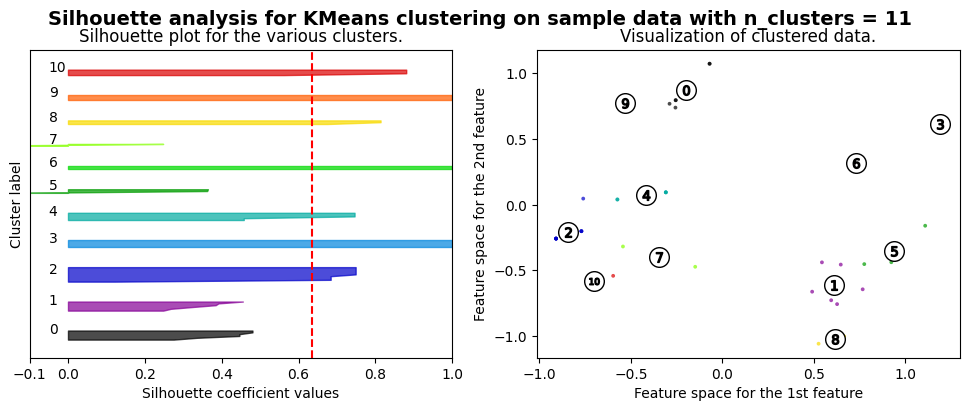

For n_clusters = 12, the average silhouette score is: 0.69
For n_clusters = 12, the Calinski-Harabasz index is: 254.36
For n_clusters = 12, the Davies-Bouldin score is: 0.48


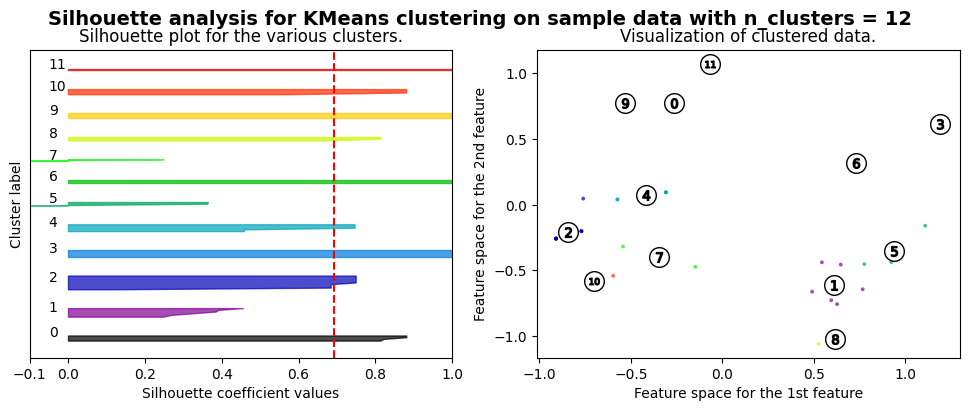

For n_clusters = 13, the average silhouette score is: 0.73
For n_clusters = 13, the Calinski-Harabasz index is: 302.84
For n_clusters = 13, the Davies-Bouldin score is: 0.46


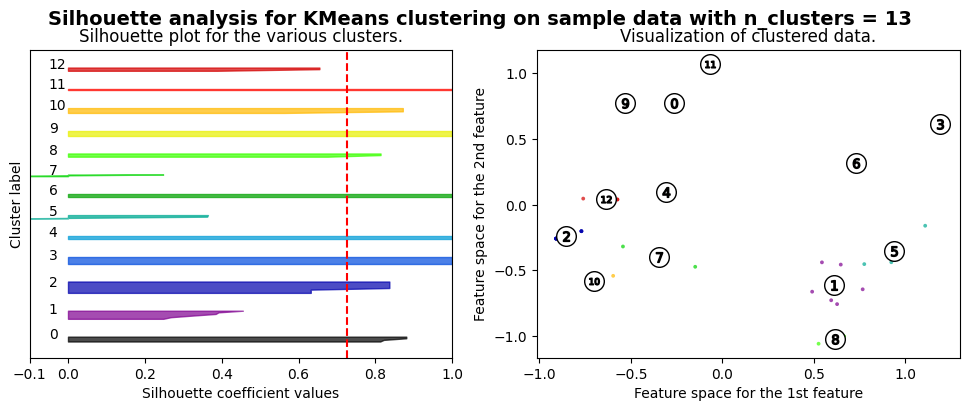

For n_clusters = 14, the average silhouette score is: 0.72
For n_clusters = 14, the Calinski-Harabasz index is: 361.27
For n_clusters = 14, the Davies-Bouldin score is: 0.45


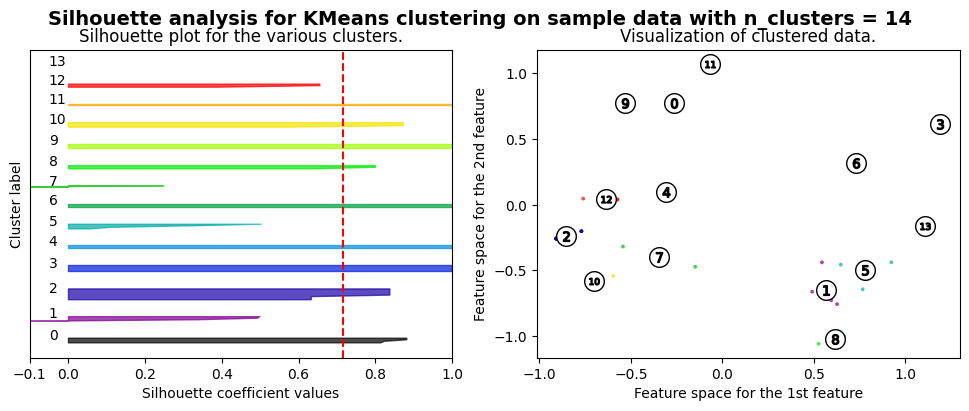

For n_clusters = 15, the average silhouette score is: 0.71
For n_clusters = 15, the Calinski-Harabasz index is: 449.36
For n_clusters = 15, the Davies-Bouldin score is: 0.34


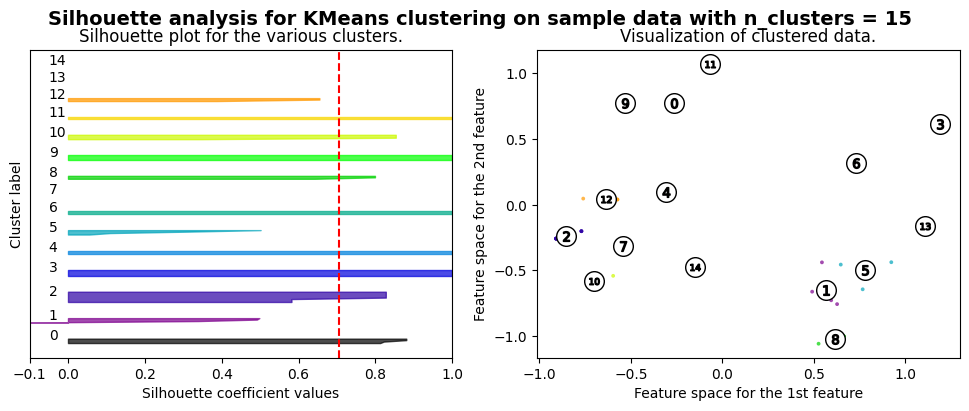

For n_clusters = 16, the average silhouette score is: 0.75
For n_clusters = 16, the Calinski-Harabasz index is: 494.34
For n_clusters = 16, the Davies-Bouldin score is: 0.31


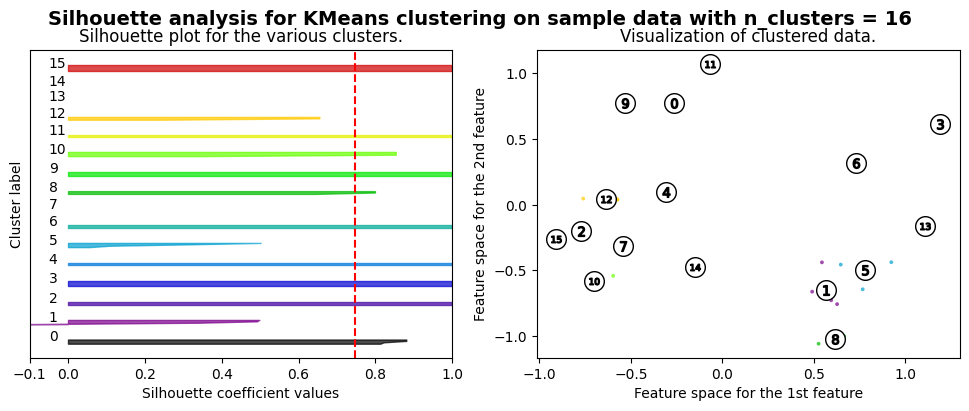

For n_clusters = 17, the average silhouette score is: 0.76
For n_clusters = 17, the Calinski-Harabasz index is: 741.66
For n_clusters = 17, the Davies-Bouldin score is: 0.28


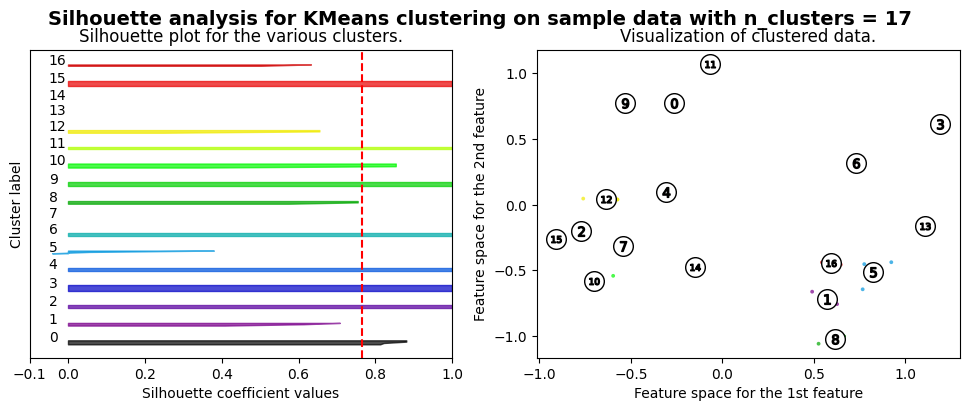

For n_clusters = 18, the average silhouette score is: 0.76
For n_clusters = 18, the Calinski-Harabasz index is: 911.67
For n_clusters = 18, the Davies-Bouldin score is: 0.25


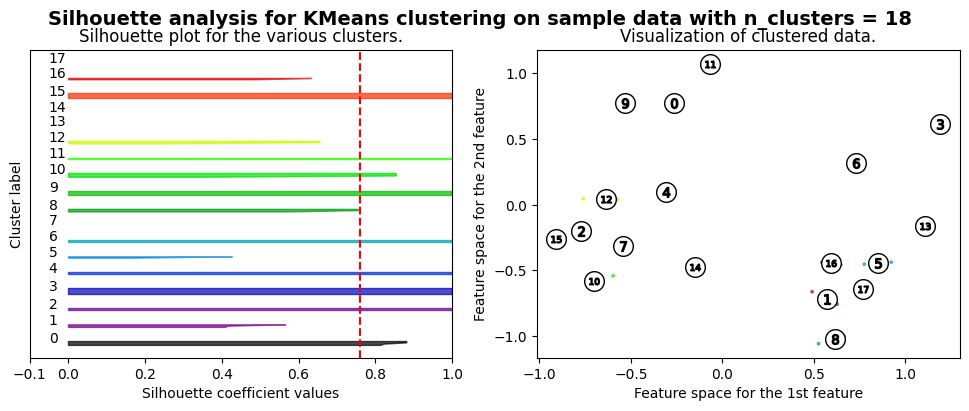

For n_clusters = 19, the average silhouette score is: 0.77
For n_clusters = 19, the Calinski-Harabasz index is: 1128.98
For n_clusters = 19, the Davies-Bouldin score is: 0.20


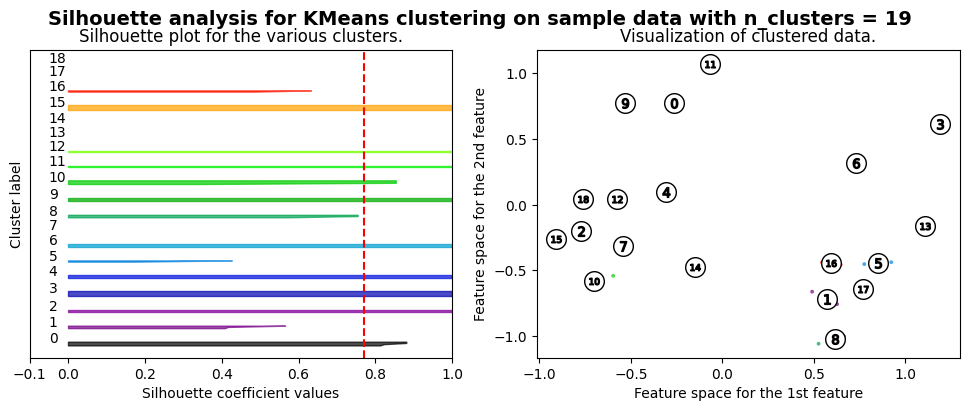

For n_clusters = 20, the average silhouette score is: 0.75
For n_clusters = 20, the Calinski-Harabasz index is: 1242.70
For n_clusters = 20, the Davies-Bouldin score is: 0.18


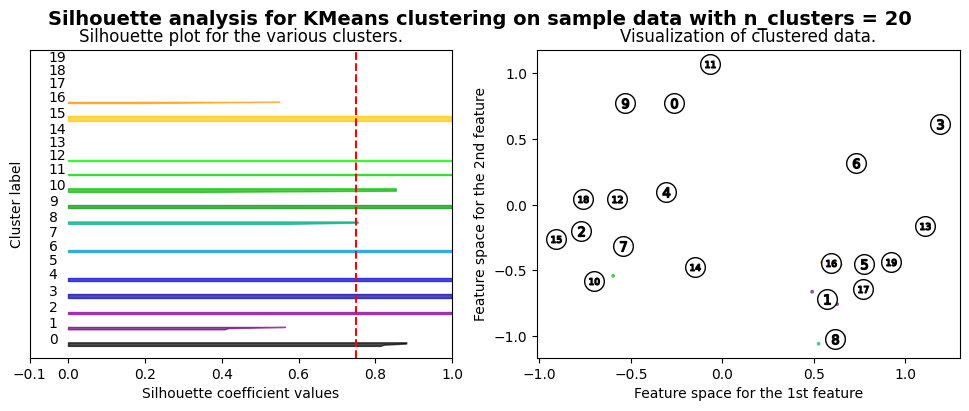

In [182]:
range_n_clusters = [2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(demographics_pca) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(demographics_pca)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(demographics_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.2f}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(demographics_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(demographics_pca[:, 0], demographics_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Compute and print the Calinski-Harabasz index and Davies-Bouldin score
    calinski_harabasz = calinski_harabasz_score(demographics_pca, cluster_labels)
    davies_bouldin = davies_bouldin_score(demographics_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the Calinski-Harabasz index is: {calinski_harabasz:.2f}")
    print(f"For n_clusters = {n_clusters}, the Davies-Bouldin score is: {davies_bouldin:.2f}")

    plt.show()

### Initialization

In [159]:
# Create an instance of the KMeans model
kmeans = KMeans(n_clusters=14, n_init='auto')
cluster_labels_pca = kmeans.fit_predict(demographics_pca)
# look at correlation between people and tone preferences

### Data Points in clusters

In [160]:
unique, counts = np.unique(cluster_labels_pca, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Cluster Sizes:", cluster_sizes)

Cluster Sizes: {0: 3, 1: 4, 2: 6, 3: 5, 4: 4, 5: 7, 6: 4, 7: 2, 8: 1, 9: 4, 10: 4, 11: 1, 12: 3, 13: 2}


### Visualizing Clusters

In [161]:
pca_df = df.copy()

In [162]:
pca_df['Cluster'] = cluster_labels_pca

In [163]:
# pca_df.to_excel('../datasets/pca-dem-clusters.xlsx', index=False)

In [164]:
id_vars = pca_df.columns.difference(['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'])

In [165]:
# Melt dataframe
pca_graphs = pd.melt(pca_df, id_vars=id_vars, value_vars=['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'],value_name='tone')
pca_graphs.drop('variable',axis=1, inplace=True)

In [166]:
# List of columns to plot
columns_to_plot = ['age', 'disability', 'education', 'employment', 'ethnicity', 'gender', 'income', 'language', 'marital_status', 'race', 'tone']

### Visualization by Cluster

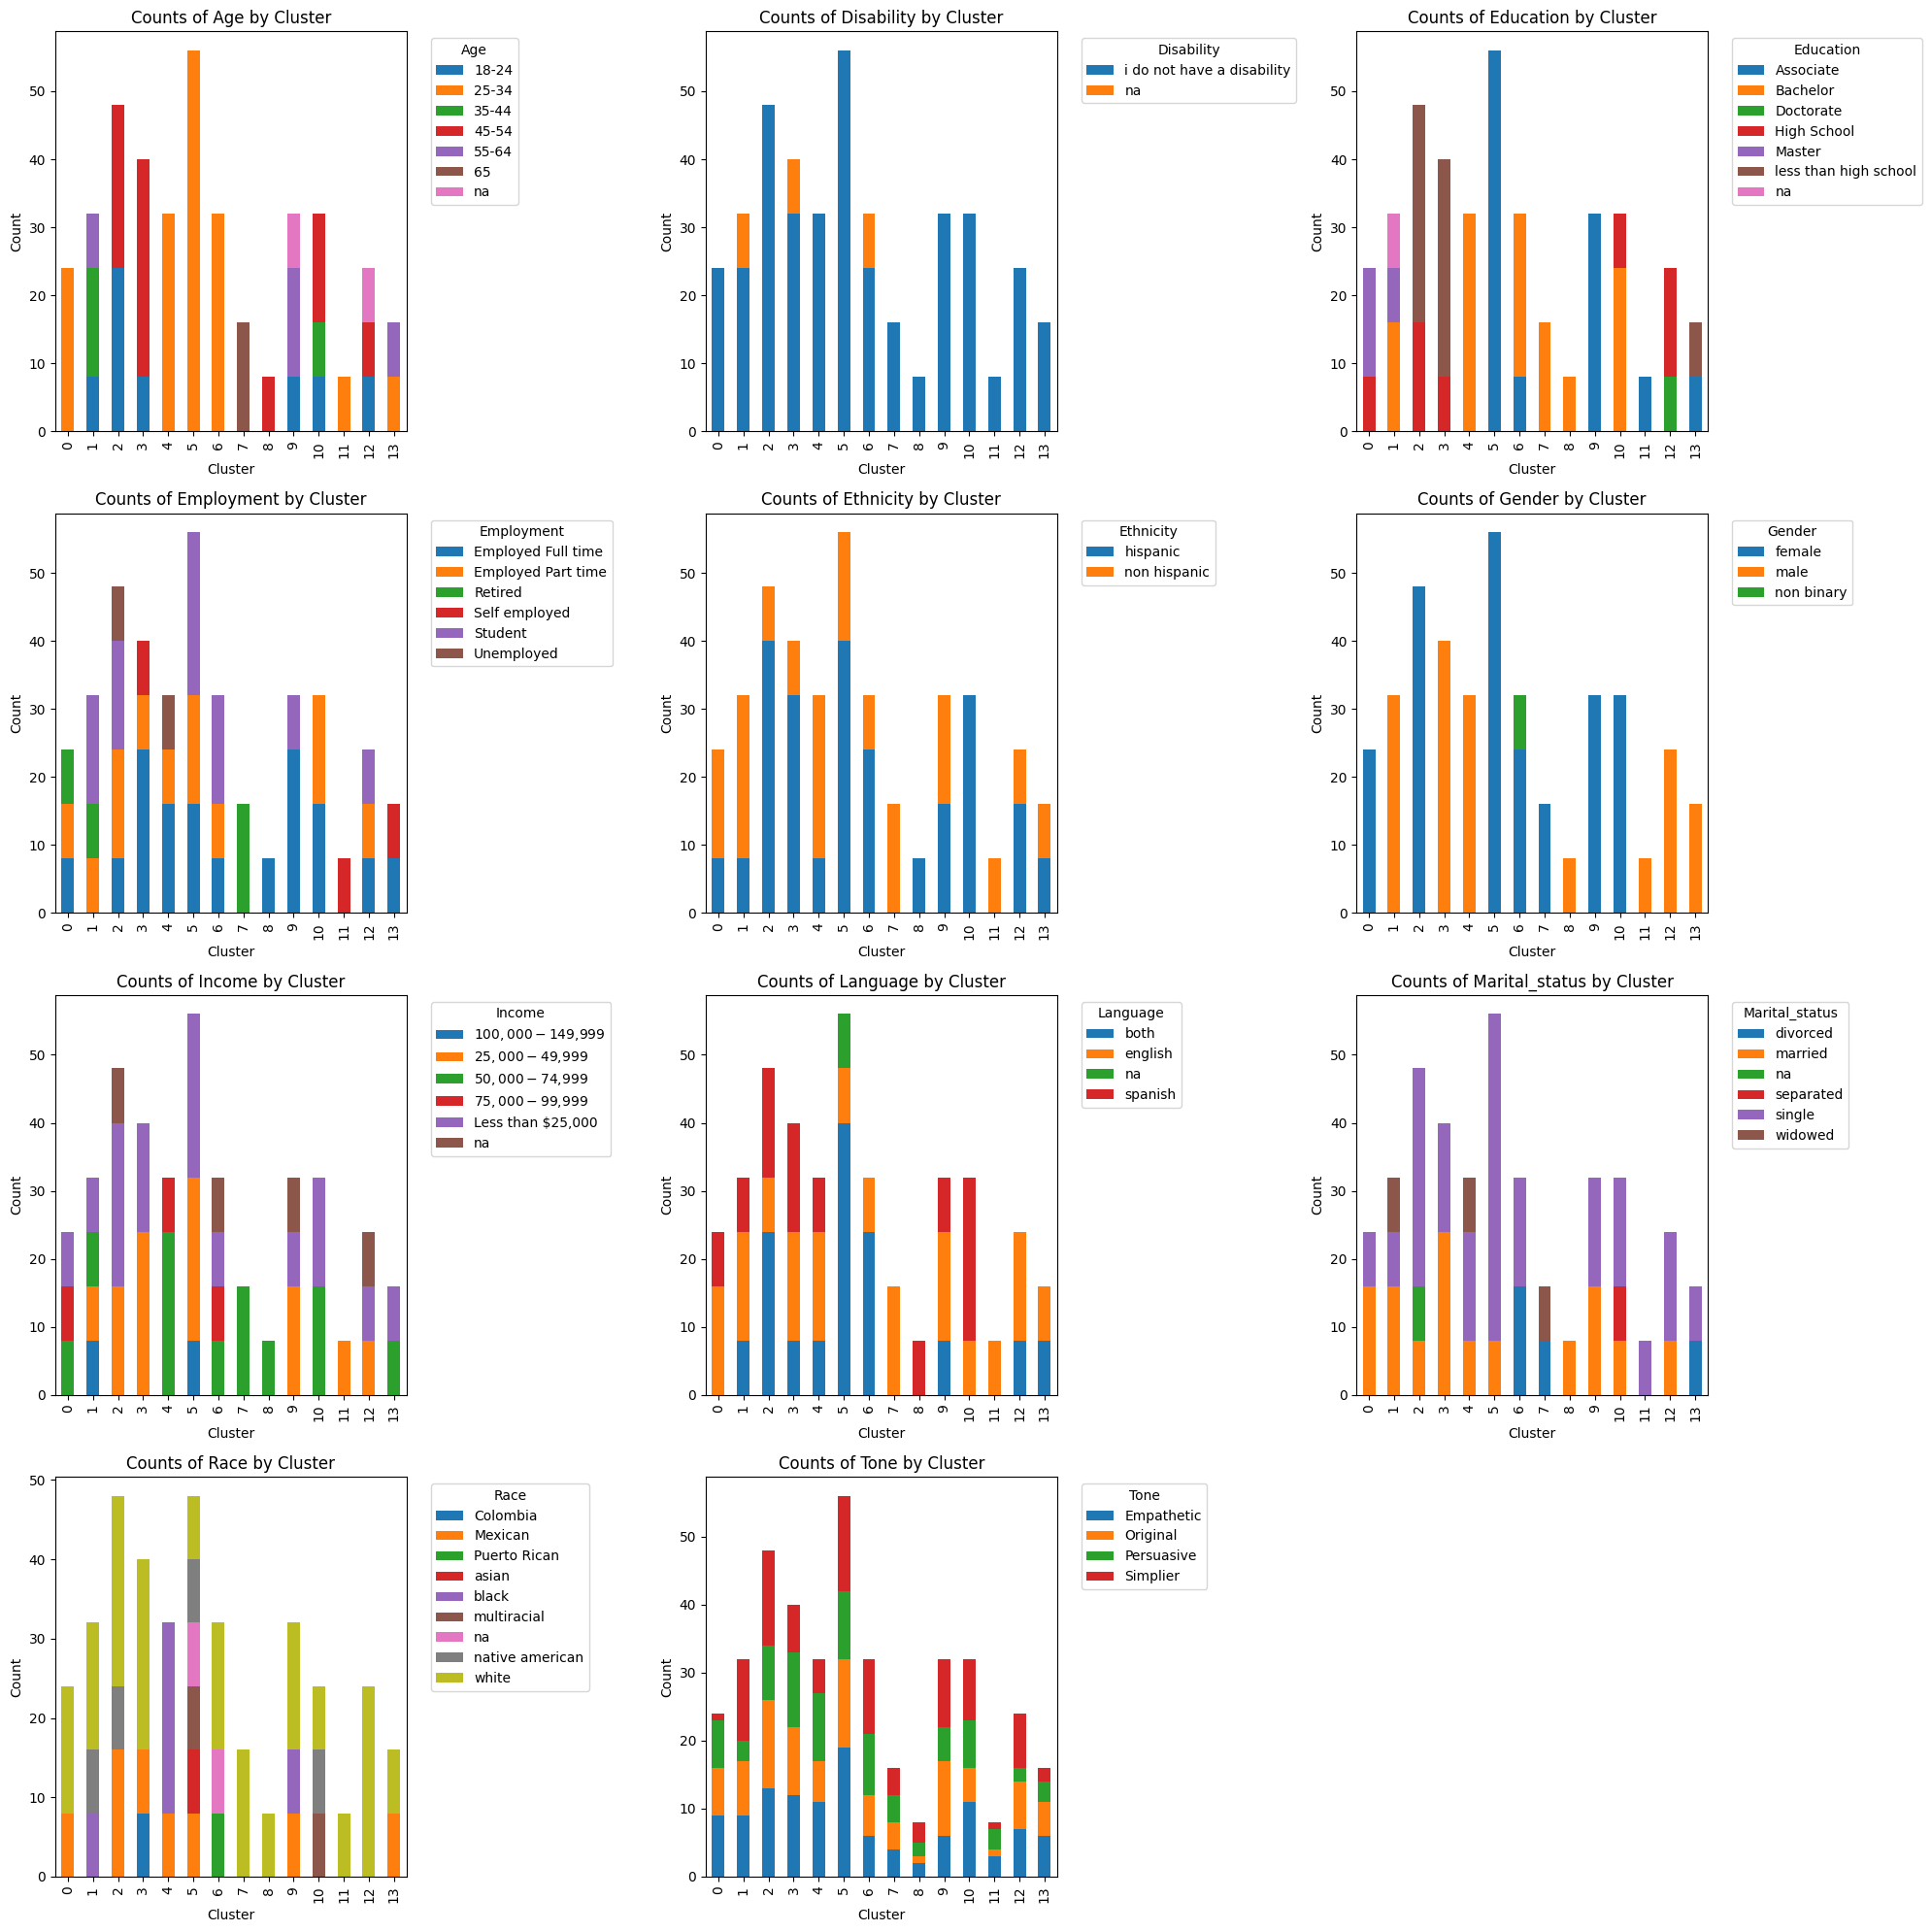

In [167]:
# Number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate stacked bar charts for each column
for idx, column in enumerate(columns_to_plot):
    # Aggregate data for the given column
    cluster_option_counts = pca_graphs.groupby(['Cluster', column]).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart on the corresponding subplot
    ax = cluster_option_counts.plot(kind='bar', stacked=True, ax=axes[idx])
    
    # Add labels and title
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of {column.capitalize()} by Cluster')
    ax.legend(title=column.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout for the subplot
    plt.tight_layout()

# Remove any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Show all plots
plt.show()

### Visualization by Attribute

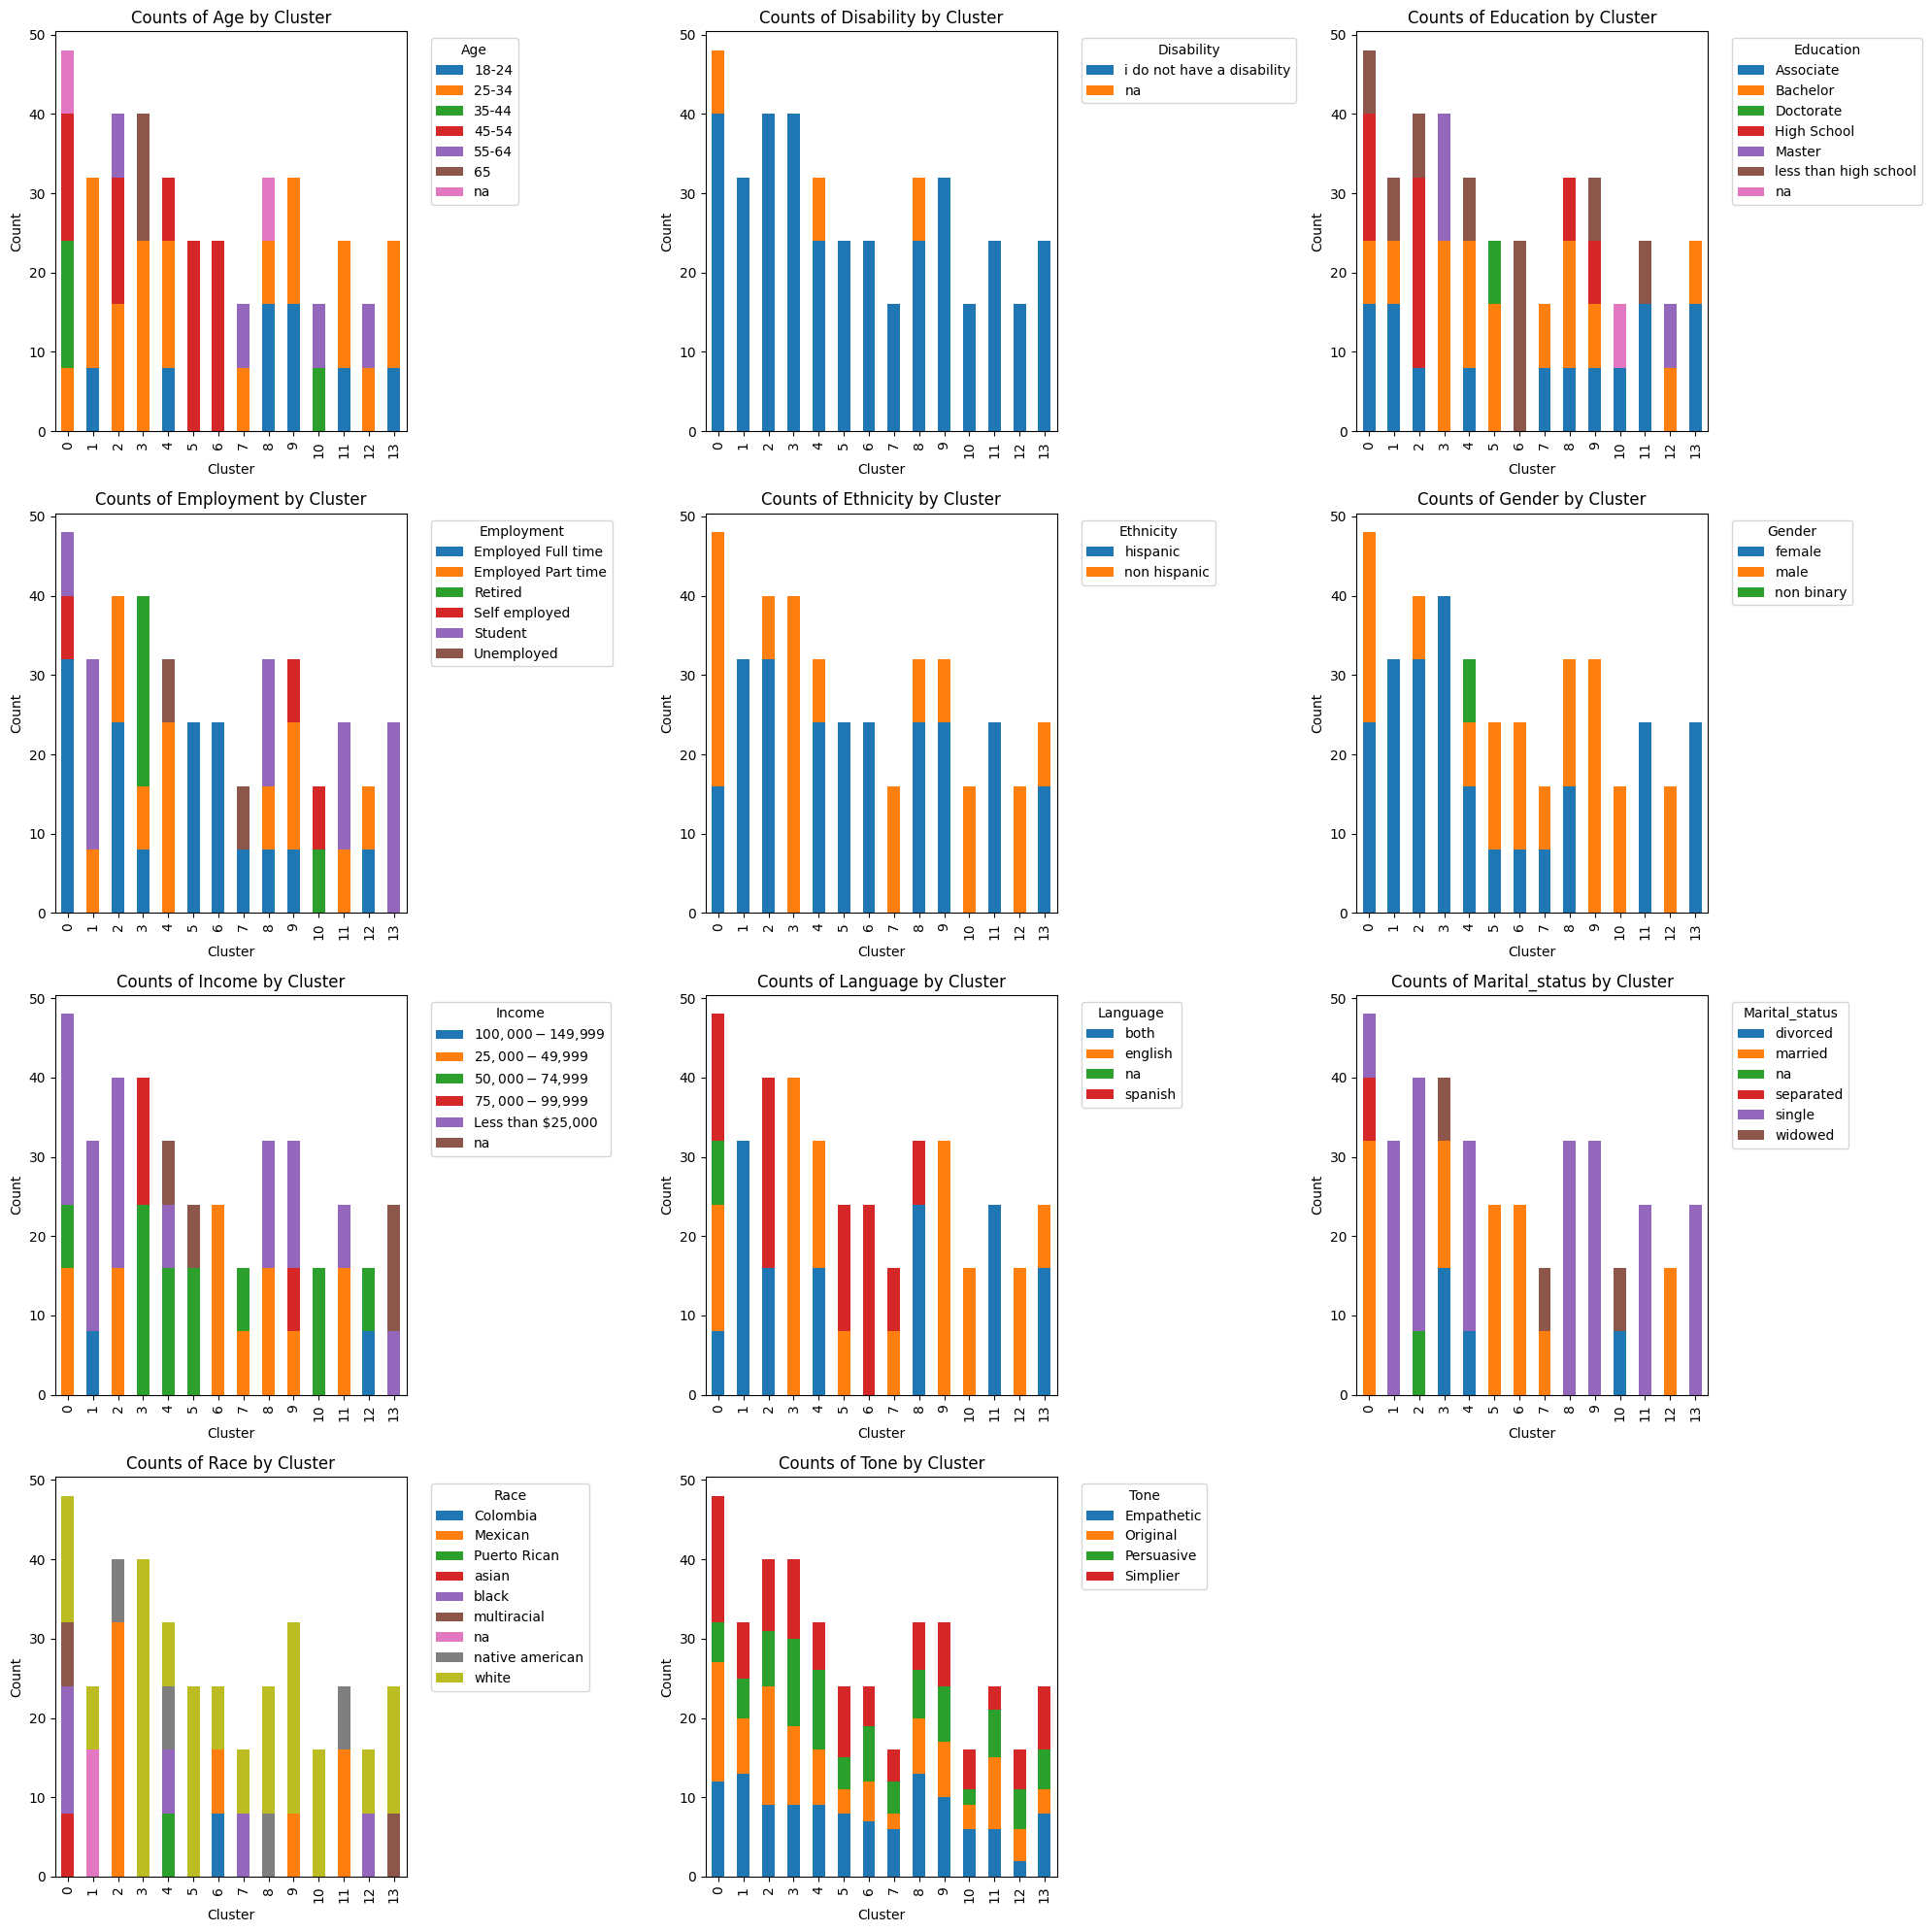

In [114]:
# Number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate stacked bar charts for each column
for idx, column in enumerate(columns_to_plot):
    # Aggregate data for the given column
    cluster_option_counts = pca_graphs.groupby(['Cluster', column]).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart on the corresponding subplot
    ax = cluster_option_counts.plot(kind='bar', stacked=True, ax=axes[idx])
    
    # Add labels and title
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of {column.capitalize()} by Cluster')
    ax.legend(title=column.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout for the subplot
    plt.tight_layout()

# Remove any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Show all plots
plt.show()

## T-SNE Dimensionality Reduction

In [115]:
tsne = TSNE(n_components=2)  # Reduce to 2 dimensions
X_tsne = tsne.fit_transform(demographics_encoded) # type: ignore

### Elbow Method

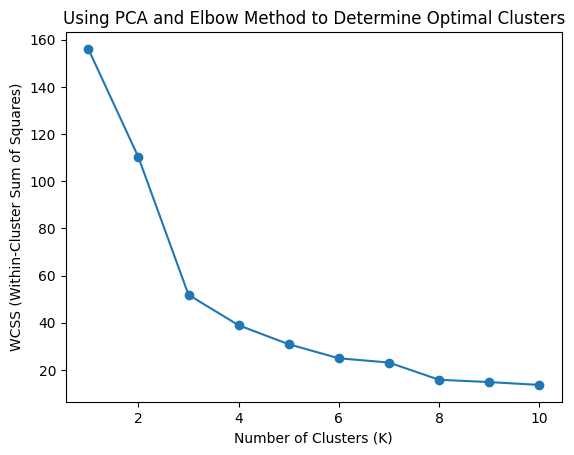

In [116]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_tsne)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plotting the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Using PCA and Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

For n_clusters = 2, the average silhouette score is: 0.28
For n_clusters = 2, the Calinski-Harabasz index is: 20.01
For n_clusters = 2, the Davies-Bouldin score is: 1.40


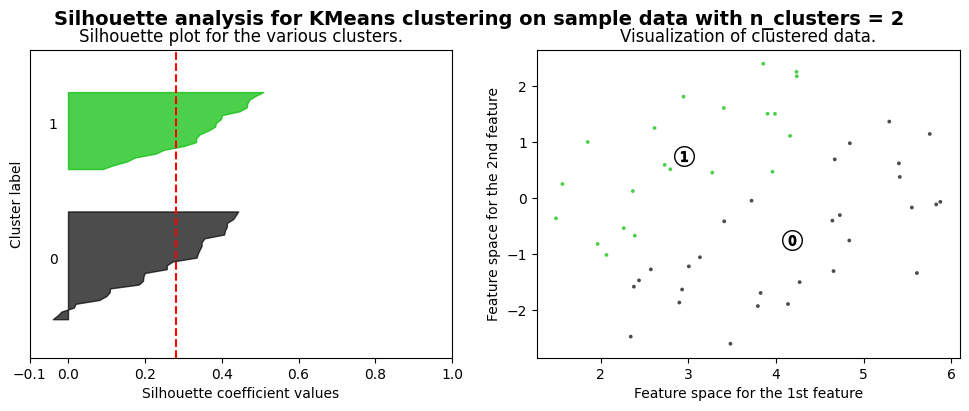

For n_clusters = 3, the average silhouette score is: 0.42
For n_clusters = 3, the Calinski-Harabasz index is: 47.28
For n_clusters = 3, the Davies-Bouldin score is: 0.83


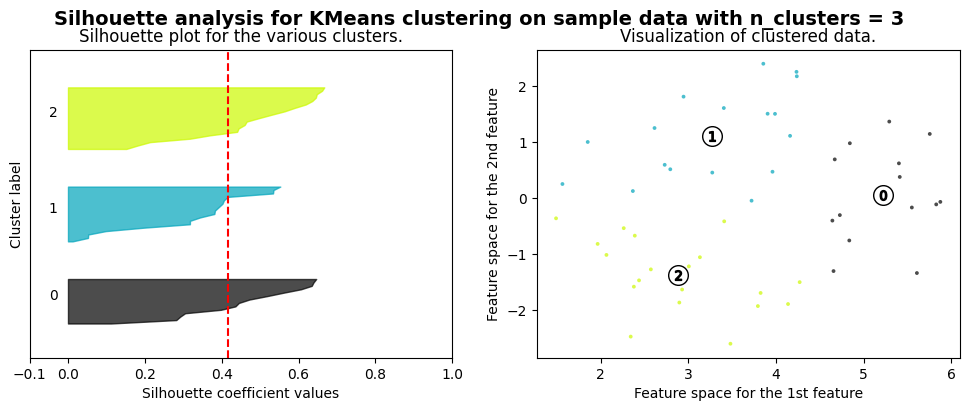

For n_clusters = 4, the average silhouette score is: 0.38
For n_clusters = 4, the Calinski-Harabasz index is: 46.16
For n_clusters = 4, the Davies-Bouldin score is: 0.80


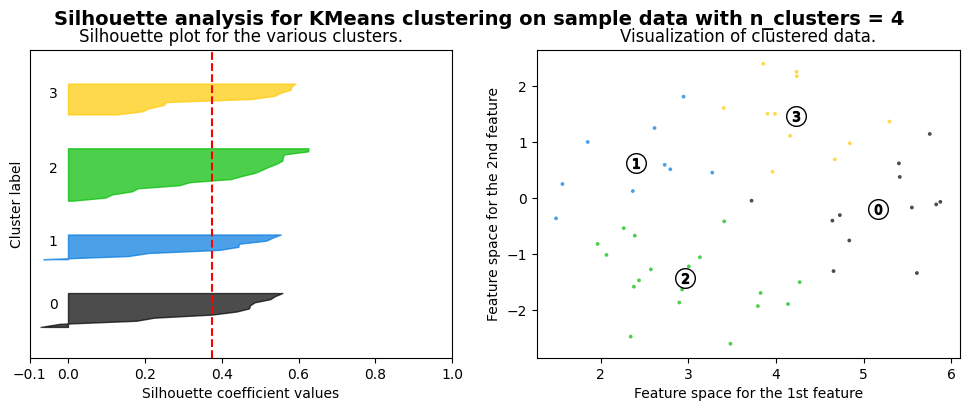

For n_clusters = 5, the average silhouette score is: 0.36
For n_clusters = 5, the Calinski-Harabasz index is: 45.62
For n_clusters = 5, the Davies-Bouldin score is: 0.78


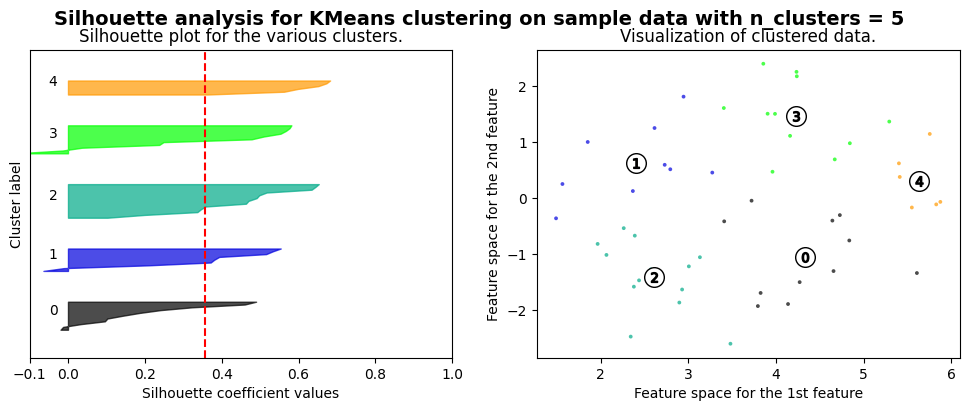

For n_clusters = 7, the average silhouette score is: 0.31
For n_clusters = 7, the Calinski-Harabasz index is: 41.22
For n_clusters = 7, the Davies-Bouldin score is: 0.89


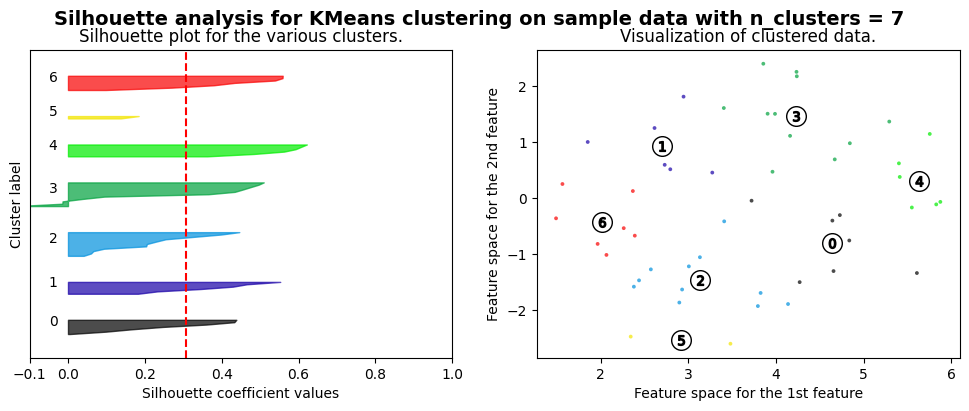

For n_clusters = 8, the average silhouette score is: 0.39
For n_clusters = 8, the Calinski-Harabasz index is: 53.22
For n_clusters = 8, the Davies-Bouldin score is: 0.74


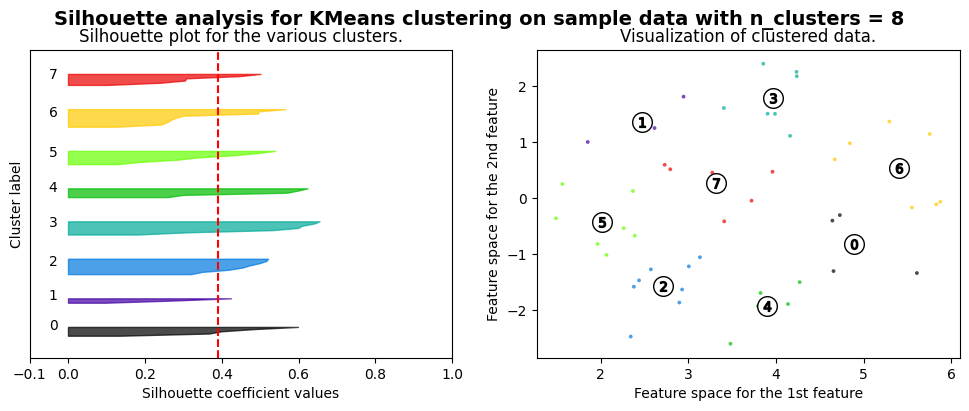

For n_clusters = 9, the average silhouette score is: 0.37
For n_clusters = 9, the Calinski-Harabasz index is: 48.79
For n_clusters = 9, the Davies-Bouldin score is: 0.74


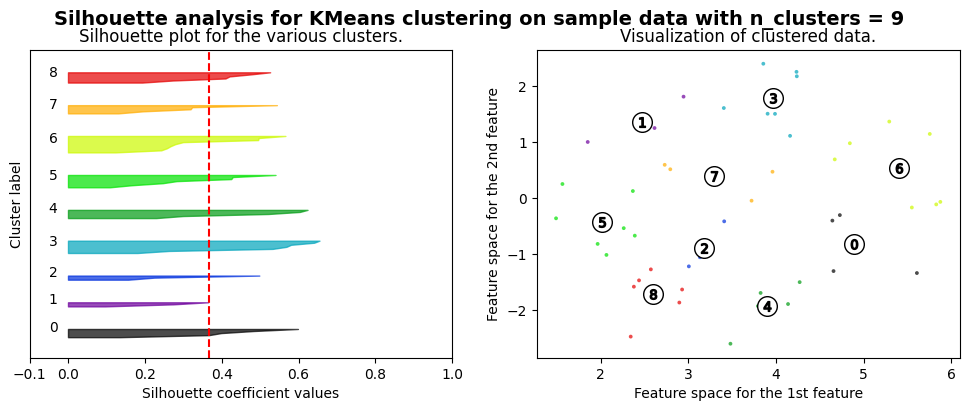

For n_clusters = 10, the average silhouette score is: 0.35
For n_clusters = 10, the Calinski-Harabasz index is: 46.45
For n_clusters = 10, the Davies-Bouldin score is: 0.83


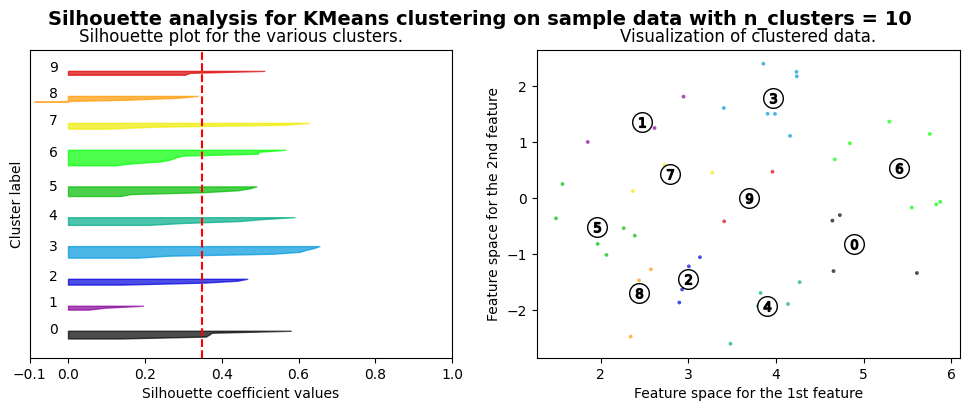

In [117]:
range_n_clusters = [2, 3, 4, 5,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_tsne) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_tsne)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X_tsne, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.2f}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_tsne, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Compute and print the Calinski-Harabasz index and Davies-Bouldin score
    calinski_harabasz = calinski_harabasz_score(X_tsne, cluster_labels)
    davies_bouldin = davies_bouldin_score(X_tsne, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the Calinski-Harabasz index is: {calinski_harabasz:.2f}")
    print(f"For n_clusters = {n_clusters}, the Davies-Bouldin score is: {davies_bouldin:.2f}")

    plt.show()

### Data Points in Clusters

In [118]:
kmeans = KMeans(n_clusters=8, random_state=42, n_init='auto')
cluster_labels_tsne = kmeans.fit_predict(X_tsne)

In [119]:
tsne_df = df.copy()

In [120]:
tsne_df['Cluster'] = cluster_labels_tsne

In [121]:
id_vars = tsne_df.columns.difference(['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'])

In [122]:
# Melt dataframe
tsne_graphs = pd.melt(tsne_df, id_vars=id_vars, value_vars=['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'],value_name='tone')
tsne_graphs.drop('variable',axis=1, inplace=True)

In [123]:
tsne_graphs

Cluster    age                  disability    education  \
0          4  45-54  i do not have a disability  High School   
1          7  18-24  i do not have a disability  High School   
2          2  25-34  i do not have a disability    Associate   
3          2  25-34  i do not have a disability    Associate   
4          5  18-24                          na     Bachelor   
..       ...    ...                         ...          ...   
395        0     na  i do not have a disability    Associate   
396        1  25-34  i do not have a disability    Associate   
397        5  25-34  i do not have a disability     Bachelor   
398        7  25-34  i do not have a disability     Bachelor   
399        6  25-34  i do not have a disability     Bachelor   

             employment     ethnicity  gender             income language  \
0    Employed Part time  non hispanic  female  $25,000 - $49,999     both   
1    Employed Part time      hispanic    male  Less than $25,000  english   
2               Student  non hispanic  female  Less than $25,000  english   
3    Employed Part time      hispanic  female  Less than $25,000     both   
4               Student      hispanic    male  $25,000 - $49,999     both   
..                  ...           ...     ...                ...      ...   
395  Employed Full time  non hispanic  female  Less than $25,000  english   
396       Self employed  non hispanic    male  $25,000 - $49,999  english   
397             Student      hispanic  female                 na     both   
398  Employed Part time  non hispanic    male  $50,000 - $74,999     both   
399  Employed Full time  non hispanic    male  $50,000 - $74,999  english   

    marital_status             race      states        tone  
0               na  native american     indiana  Persuasive  
1           single            white    illinois    Original  
2           single      multiracial    new York    Original  
3           single               na    illinois  Empathetic  
4           single  native american    illinois  Empathetic  
..             ...              ...         ...         ...  
395        married            black  new jersey  Empathetic  
396         single            white          na  Persuasive  
397         single            white  california    Simplier  
398         single            black  new jersey  Persuasive  
399        married            black    illinois  Persuasive  

[400 rows x 13 columns]

### Visualizing by Cluster

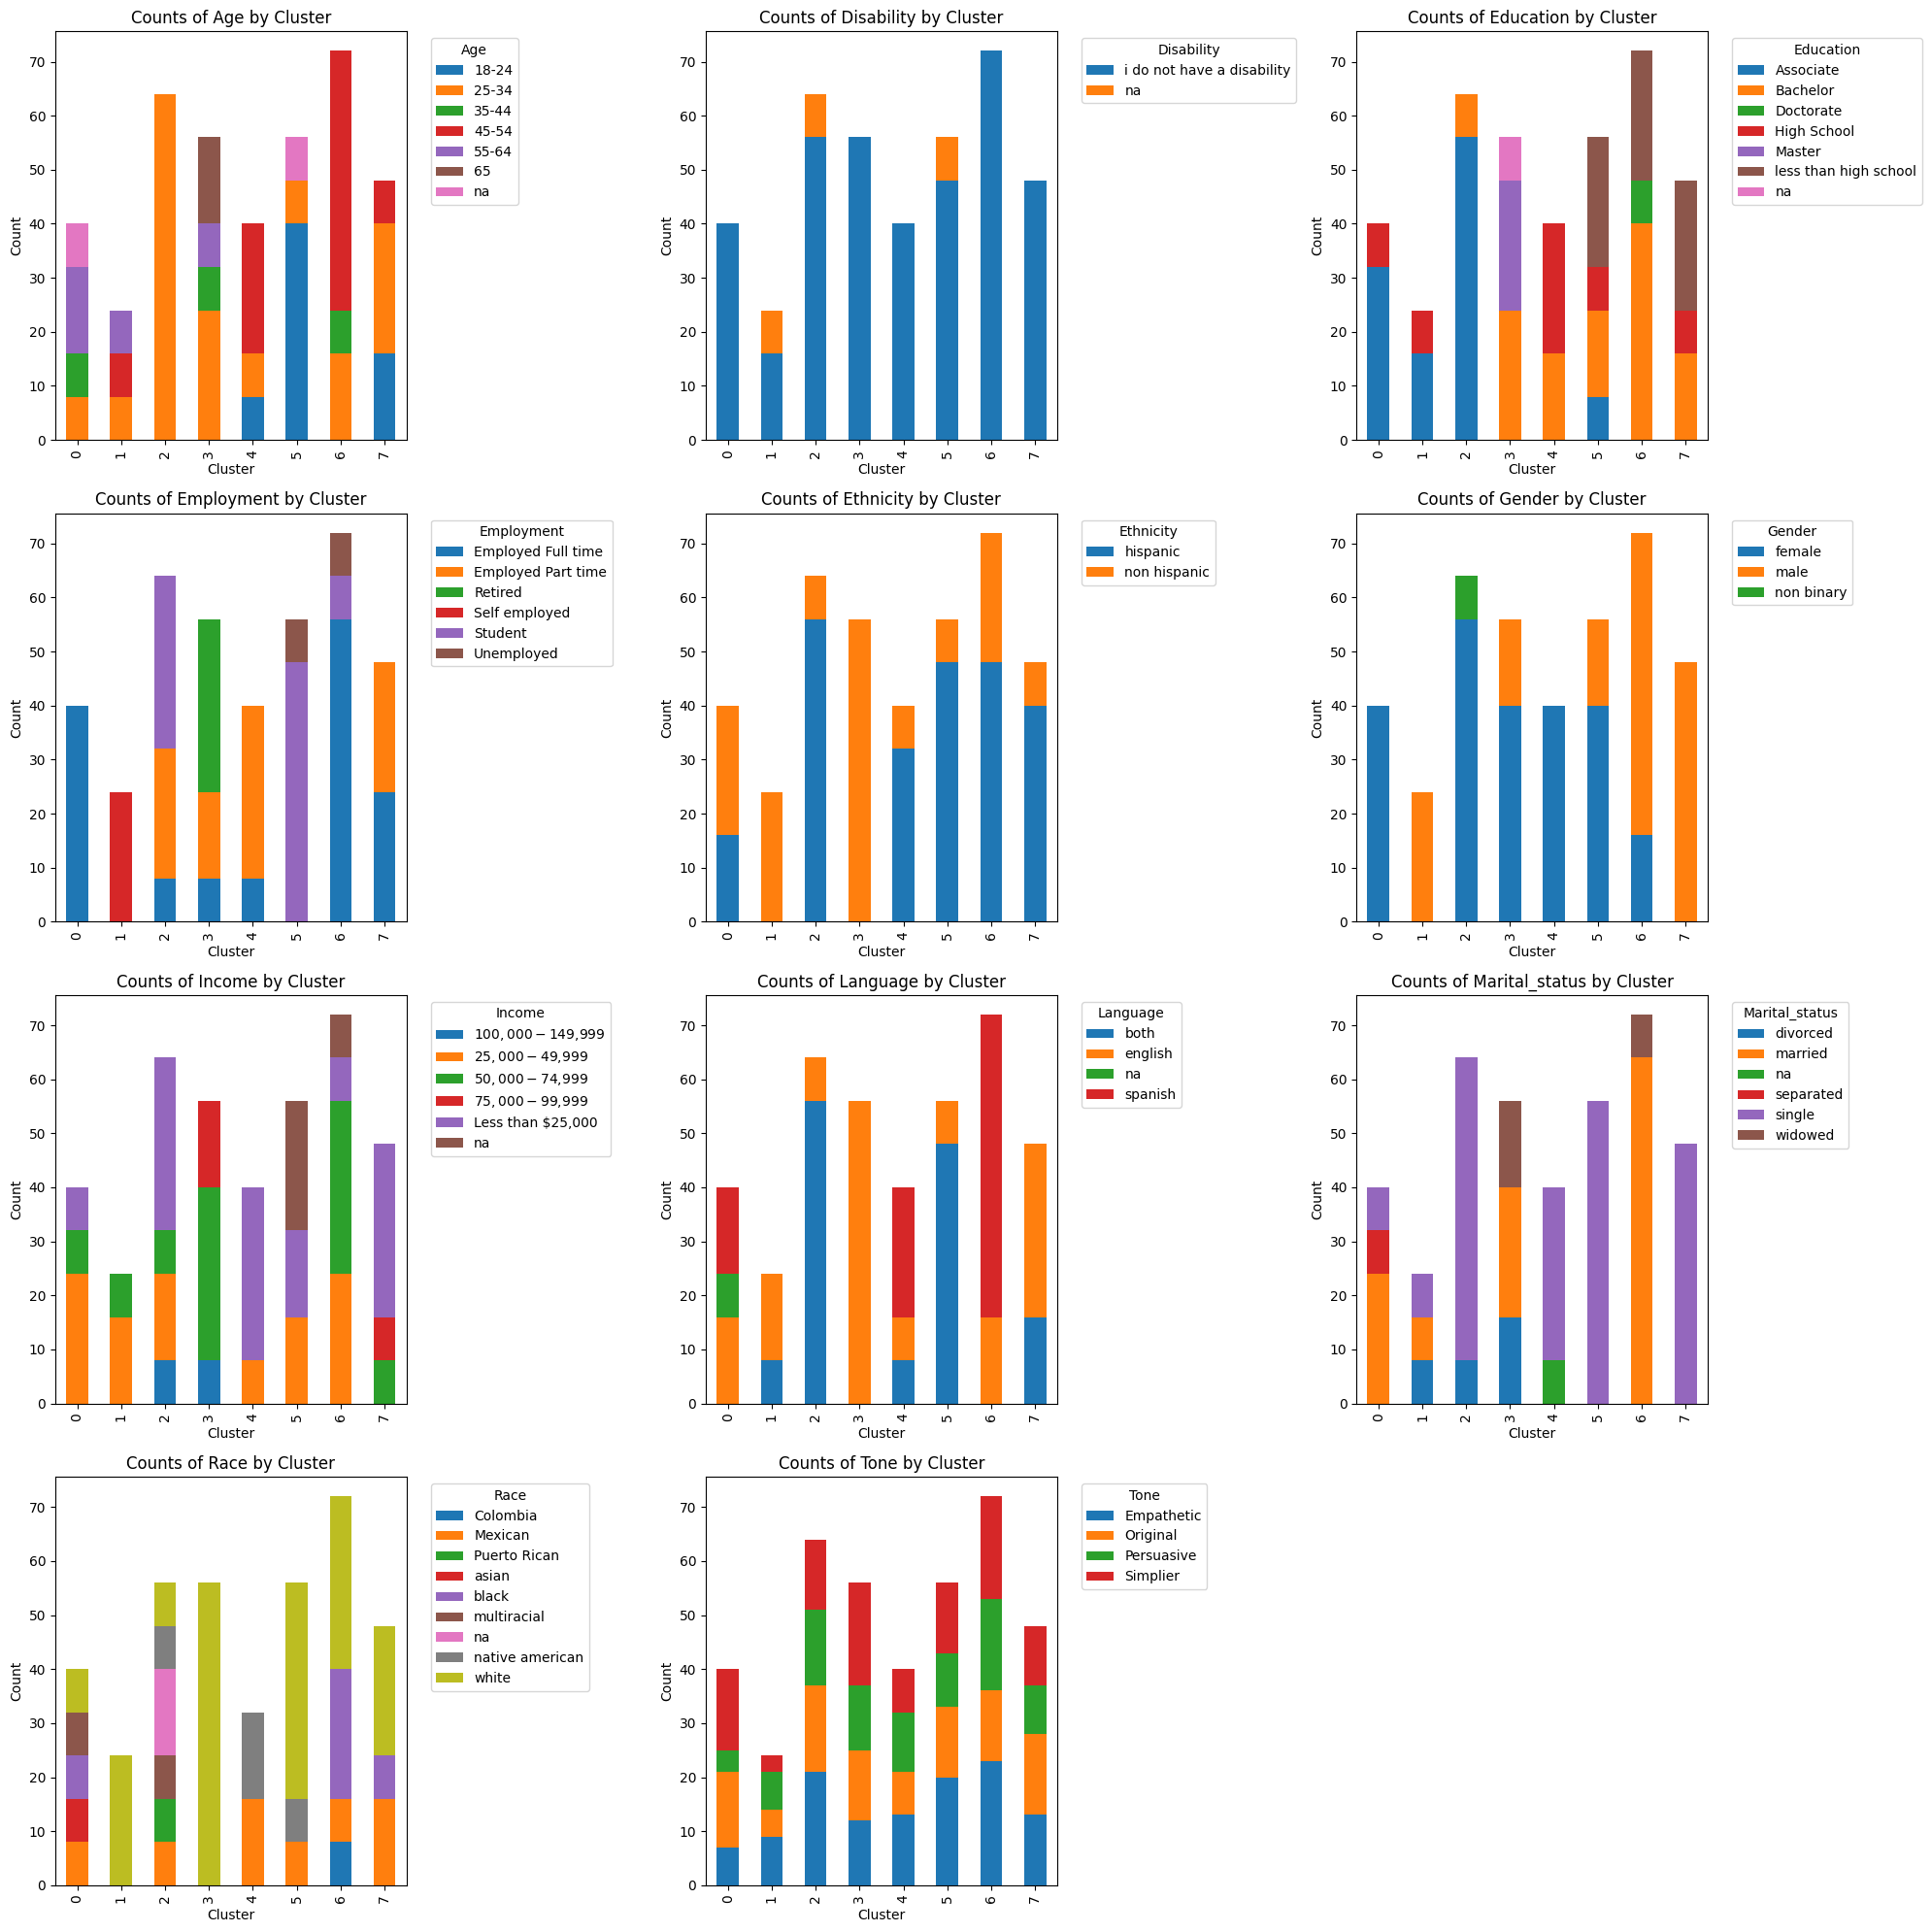

In [124]:
# Number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate stacked bar charts for each column
for idx, column in enumerate(columns_to_plot):
    # Aggregate data for the given column
    cluster_option_counts = tsne_graphs.groupby(['Cluster', column]).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart on the corresponding subplot
    ax = cluster_option_counts.plot(kind='bar', stacked=True, ax=axes[idx])
    
    # Add labels and title
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of {column.capitalize()} by Cluster')
    ax.legend(title=column.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout for the subplot
    plt.tight_layout()

# Remove any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Show all plots
plt.show()

### Visualizing by Attribute

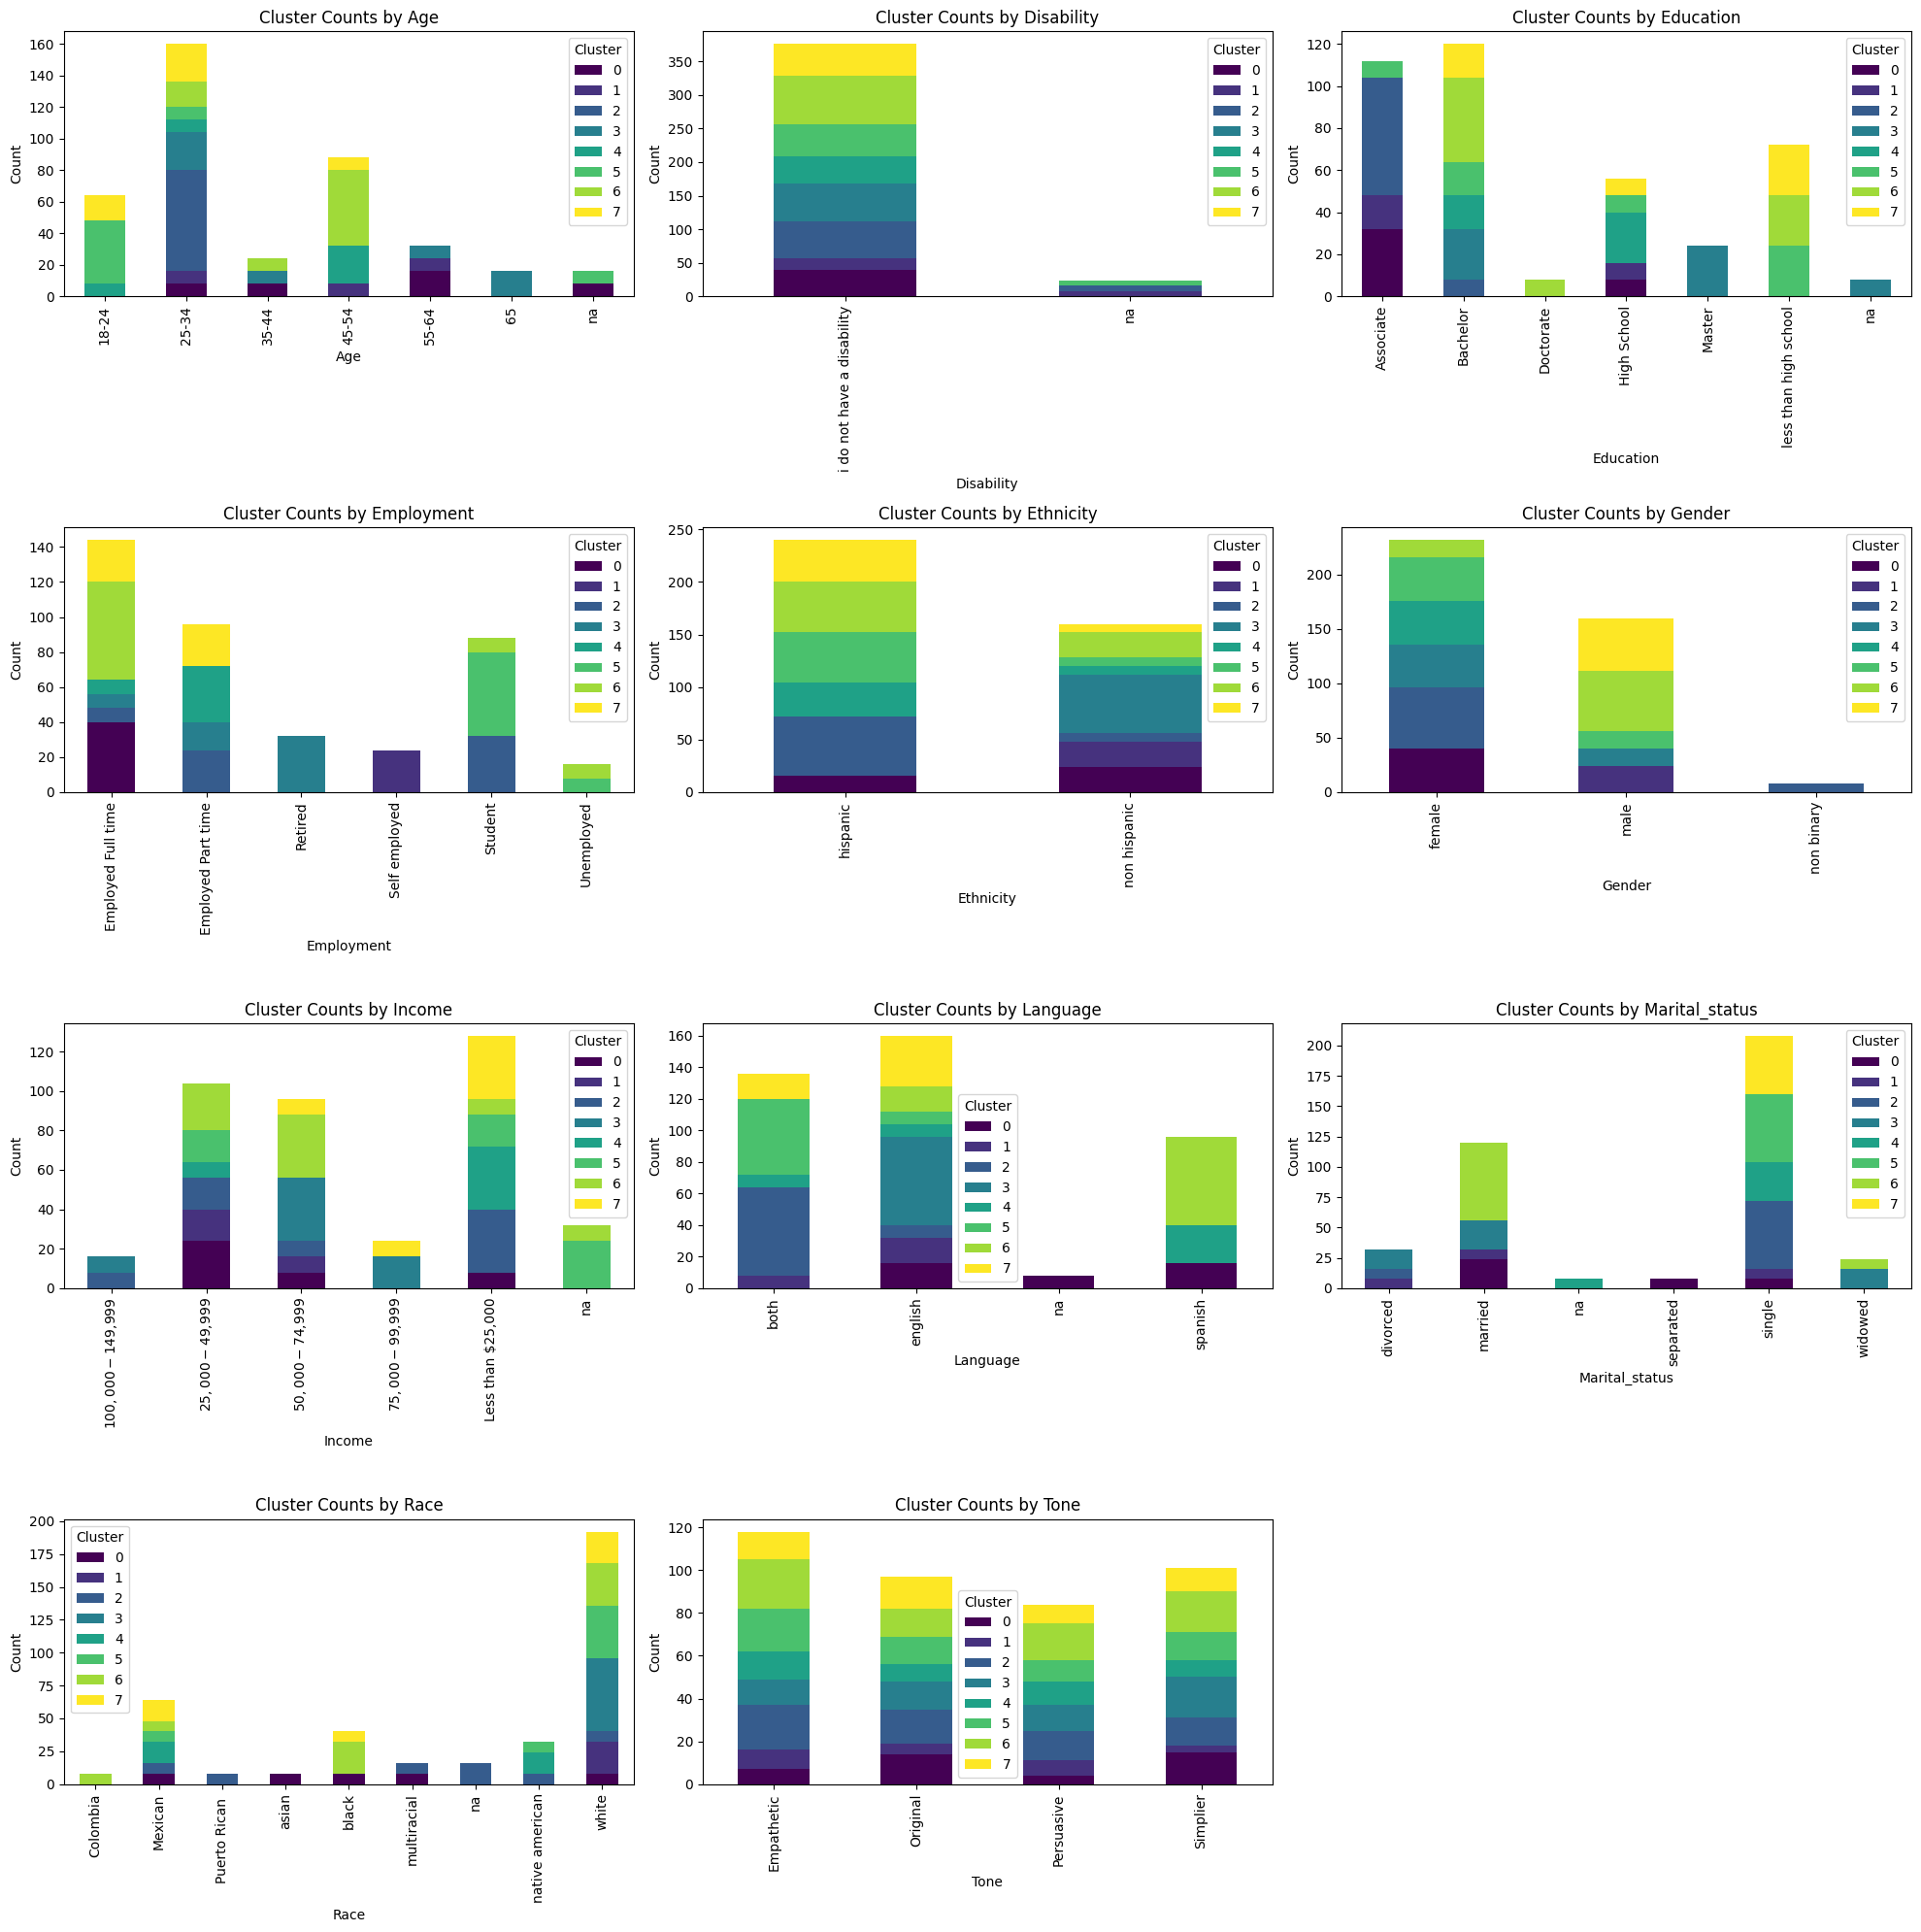

In [125]:
# Number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate stacked bar charts for each column
for idx, column in enumerate(columns_to_plot):
    # Aggregate data for the given column
    column_cluster_counts = tsne_graphs.groupby([column, 'Cluster']).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart on the corresponding subplot
    ax = column_cluster_counts.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[idx])
    
    # Add labels and title
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Count')
    ax.set_title(f'Cluster Counts by {column.capitalize()}')
    ax.legend(title='Cluster')
    
    # Adjust layout for the subplot
    plt.tight_layout()

# Remove any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Show all plots
plt.show()

### Save data

In [126]:
# tsne_df.to_excel('../datasets/tsne-dem-clusters.xlsx', index=False)

## UMAP

In [127]:
umap_model = umap.UMAP(n_components=2)  # Reduce to 2 dimensions
X_umap = umap_model.fit_transform(demographics_encoded)

For n_clusters = 2, the average silhouette score is: 0.49
For n_clusters = 2, the Calinski-Harabasz index is: 70.54
For n_clusters = 2, the Davies-Bouldin score is: 0.75


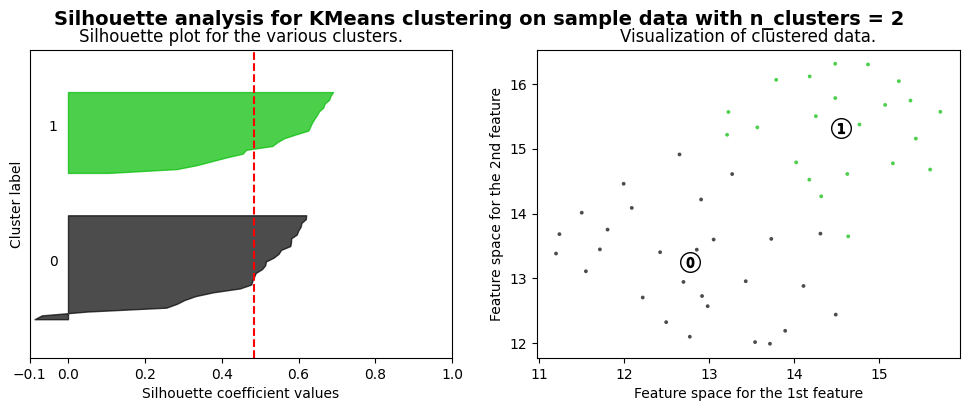

For n_clusters = 3, the average silhouette score is: 0.35
For n_clusters = 3, the Calinski-Harabasz index is: 44.98
For n_clusters = 3, the Davies-Bouldin score is: 1.10


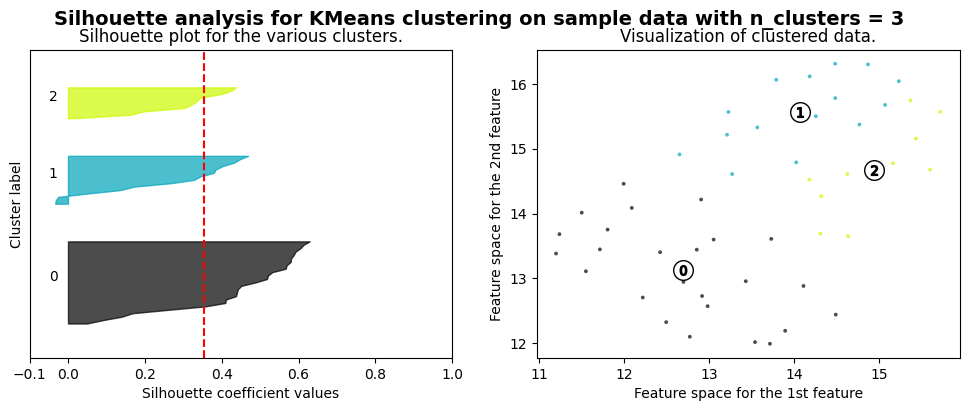

For n_clusters = 4, the average silhouette score is: 0.35
For n_clusters = 4, the Calinski-Harabasz index is: 60.40
For n_clusters = 4, the Davies-Bouldin score is: 0.94


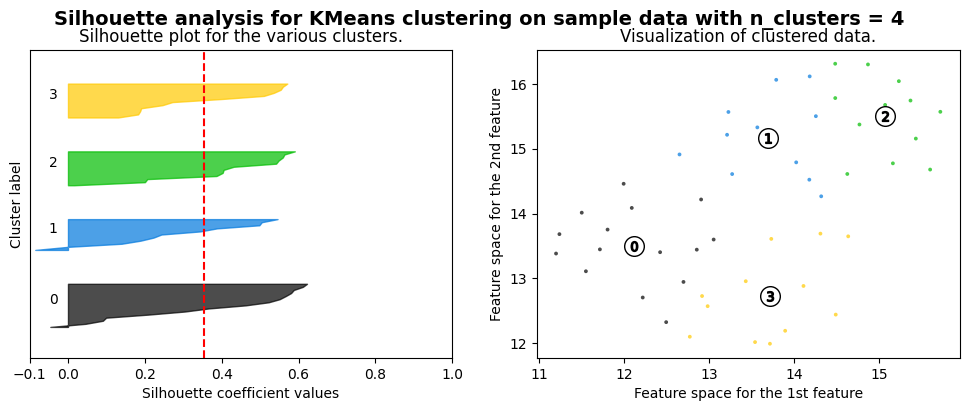

For n_clusters = 5, the average silhouette score is: 0.36
For n_clusters = 5, the Calinski-Harabasz index is: 58.09
For n_clusters = 5, the Davies-Bouldin score is: 0.83


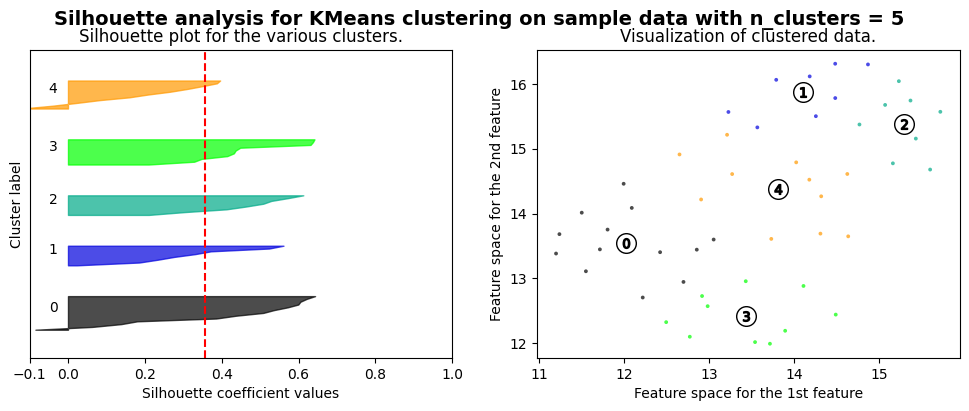

For n_clusters = 6, the average silhouette score is: 0.38
For n_clusters = 6, the Calinski-Harabasz index is: 60.76
For n_clusters = 6, the Davies-Bouldin score is: 0.77


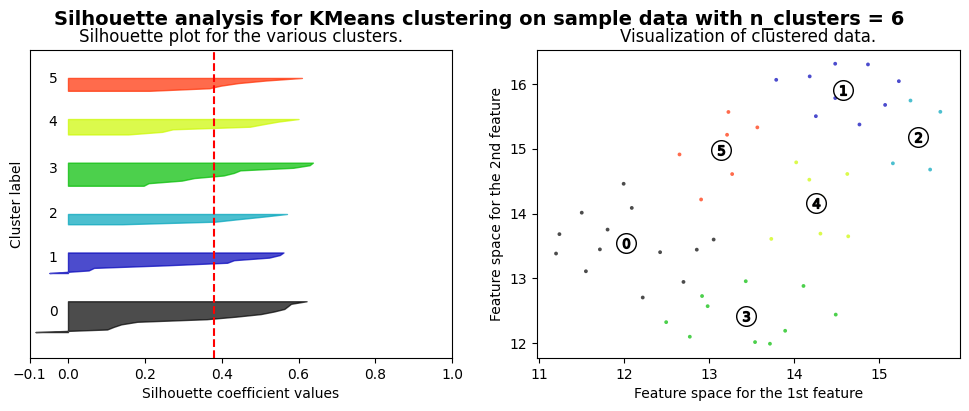

For n_clusters = 7, the average silhouette score is: 0.35
For n_clusters = 7, the Calinski-Harabasz index is: 58.06
For n_clusters = 7, the Davies-Bouldin score is: 0.76


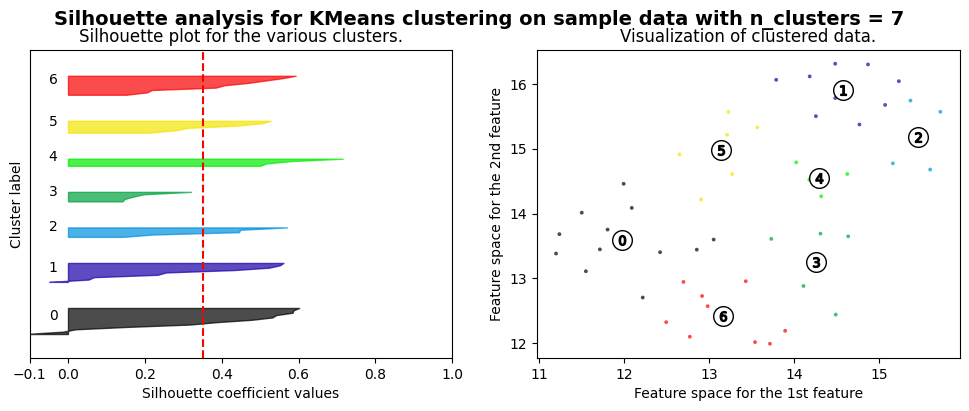

For n_clusters = 8, the average silhouette score is: 0.38
For n_clusters = 8, the Calinski-Harabasz index is: 66.43
For n_clusters = 8, the Davies-Bouldin score is: 0.78


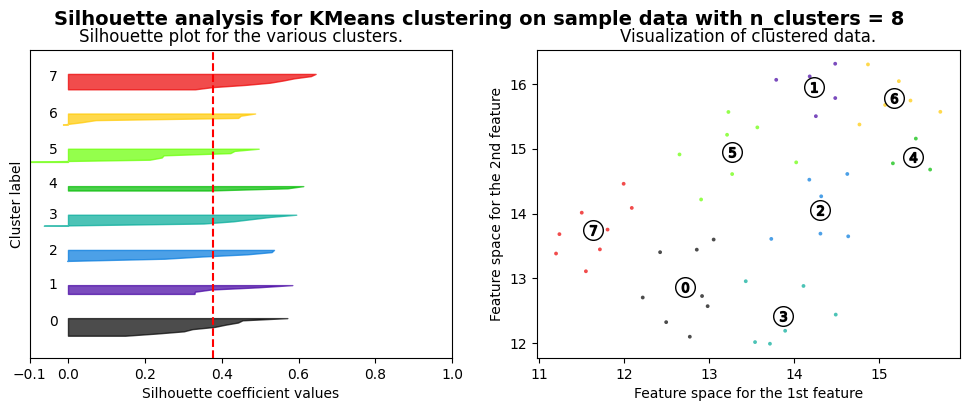

For n_clusters = 9, the average silhouette score is: 0.37
For n_clusters = 9, the Calinski-Harabasz index is: 68.47
For n_clusters = 9, the Davies-Bouldin score is: 0.74


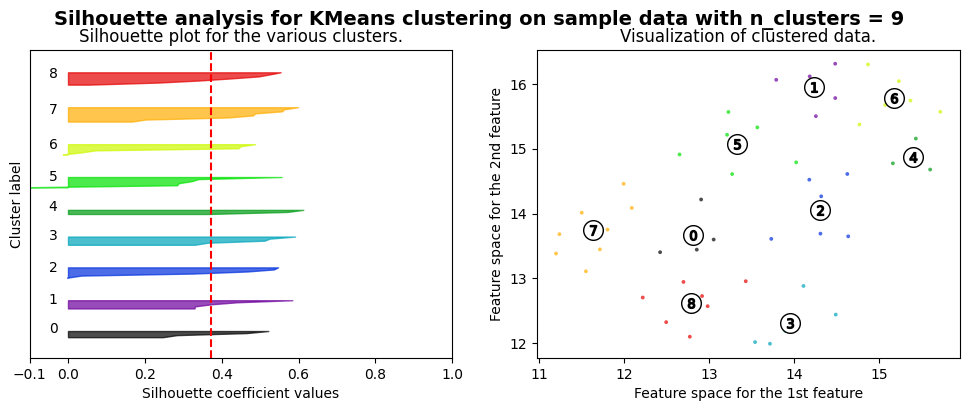

For n_clusters = 10, the average silhouette score is: 0.39
For n_clusters = 10, the Calinski-Harabasz index is: 70.13
For n_clusters = 10, the Davies-Bouldin score is: 0.72


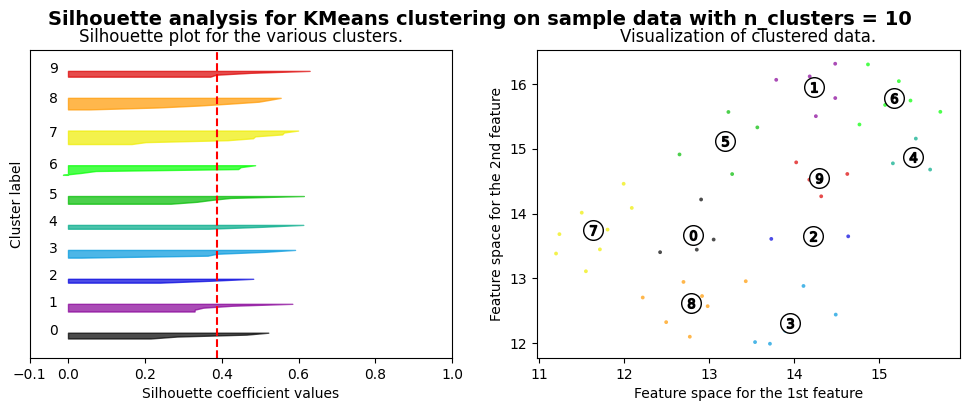

In [128]:
# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_umap) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_umap)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X_umap, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.2f}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_umap, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_umap[:, 0], X_umap[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Compute and print the Calinski-Harabasz index and Davies-Bouldin score
    calinski_harabasz = calinski_harabasz_score(X_umap, cluster_labels)
    davies_bouldin = davies_bouldin_score(X_umap, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the Calinski-Harabasz index is: {calinski_harabasz:.2f}")
    print(f"For n_clusters = {n_clusters}, the Davies-Bouldin score is: {davies_bouldin:.2f}")

    plt.show()

In [129]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
cluster_labels_umap = kmeans.fit_predict(X_umap)

In [130]:
umap_df= df.copy()

In [131]:
umap_df['Cluster'] = cluster_labels_umap

In [132]:
id_vars = umap_df.columns.difference(['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'])

In [133]:
# Melt dataframe
umap_graphs = pd.melt(umap_df, id_vars=id_vars, value_vars=['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'],value_name='tone')
umap_graphs.drop('variable',axis=1, inplace=True)

### Vizualizing by Cluster

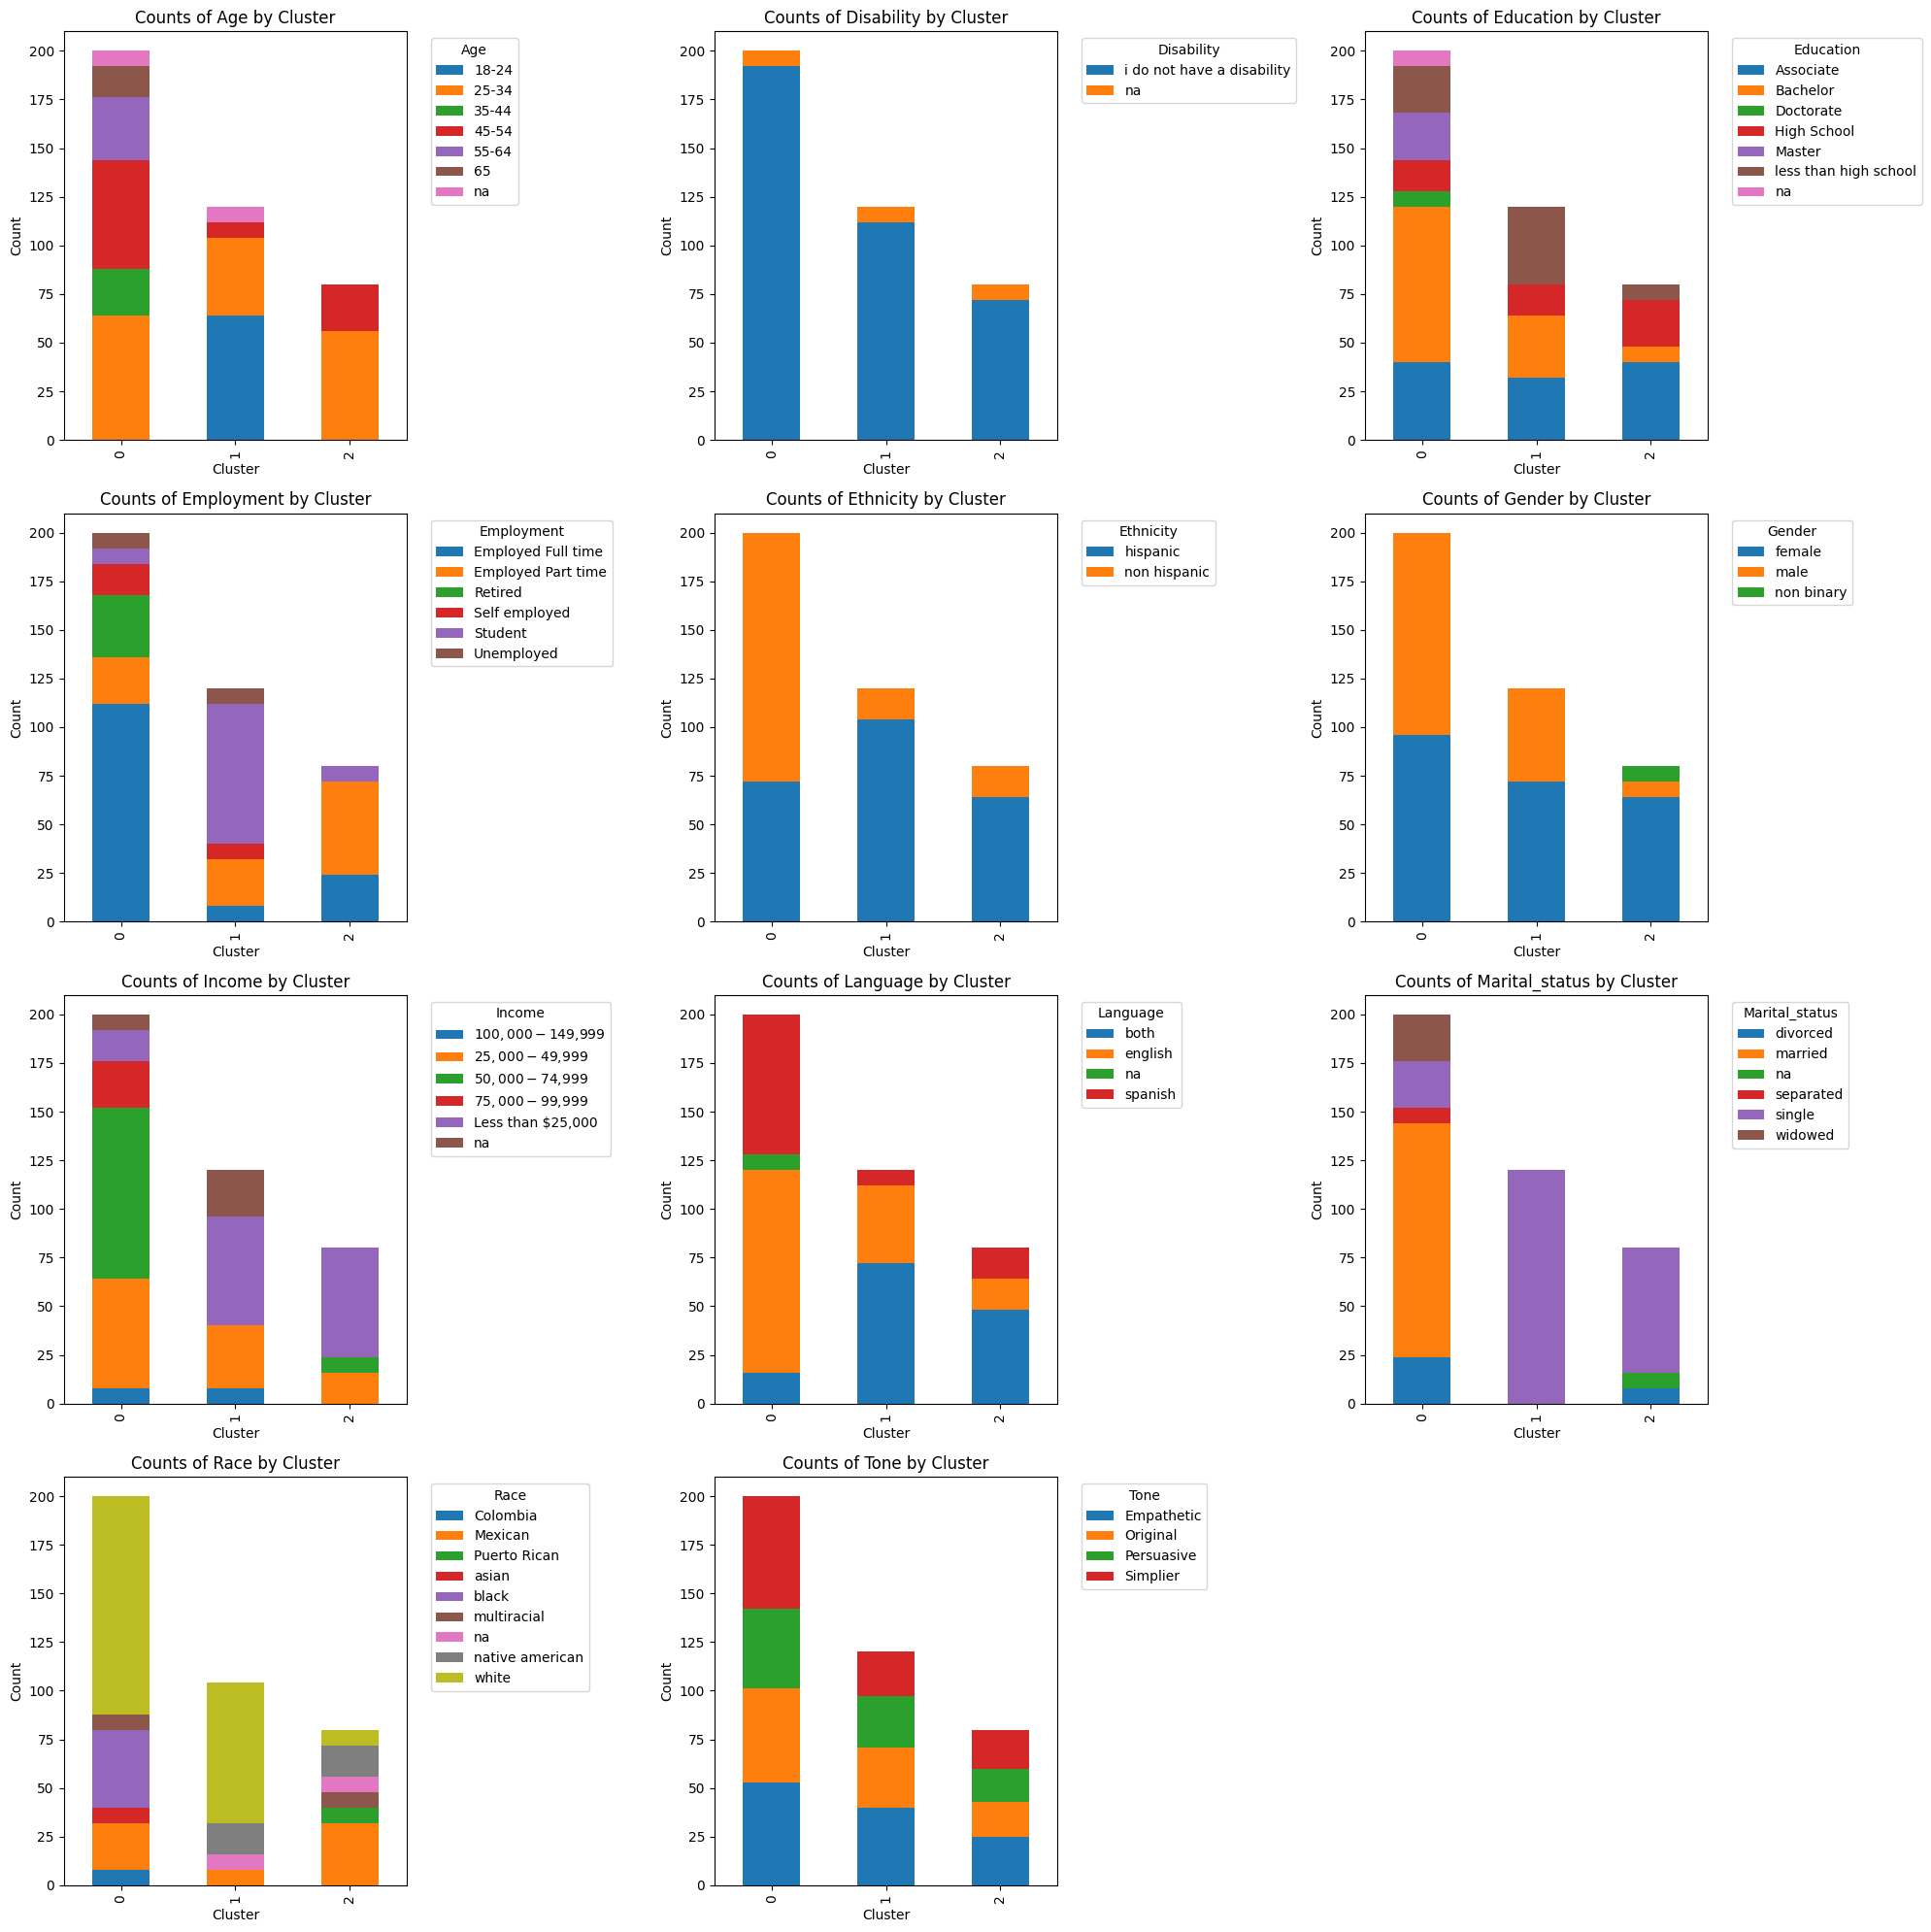

In [134]:
# Number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate stacked bar charts for each column
for idx, column in enumerate(columns_to_plot):
    # Aggregate data for the given column
    cluster_option_counts = umap_graphs.groupby(['Cluster', column]).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart on the corresponding subplot
    ax = cluster_option_counts.plot(kind='bar', stacked=True, ax=axes[idx])
    
    # Add labels and title
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of {column.capitalize()} by Cluster')
    ax.legend(title=column.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout for the subplot
    plt.tight_layout()

# Remove any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Show all plots
plt.show()

### Visualizing by Attribute

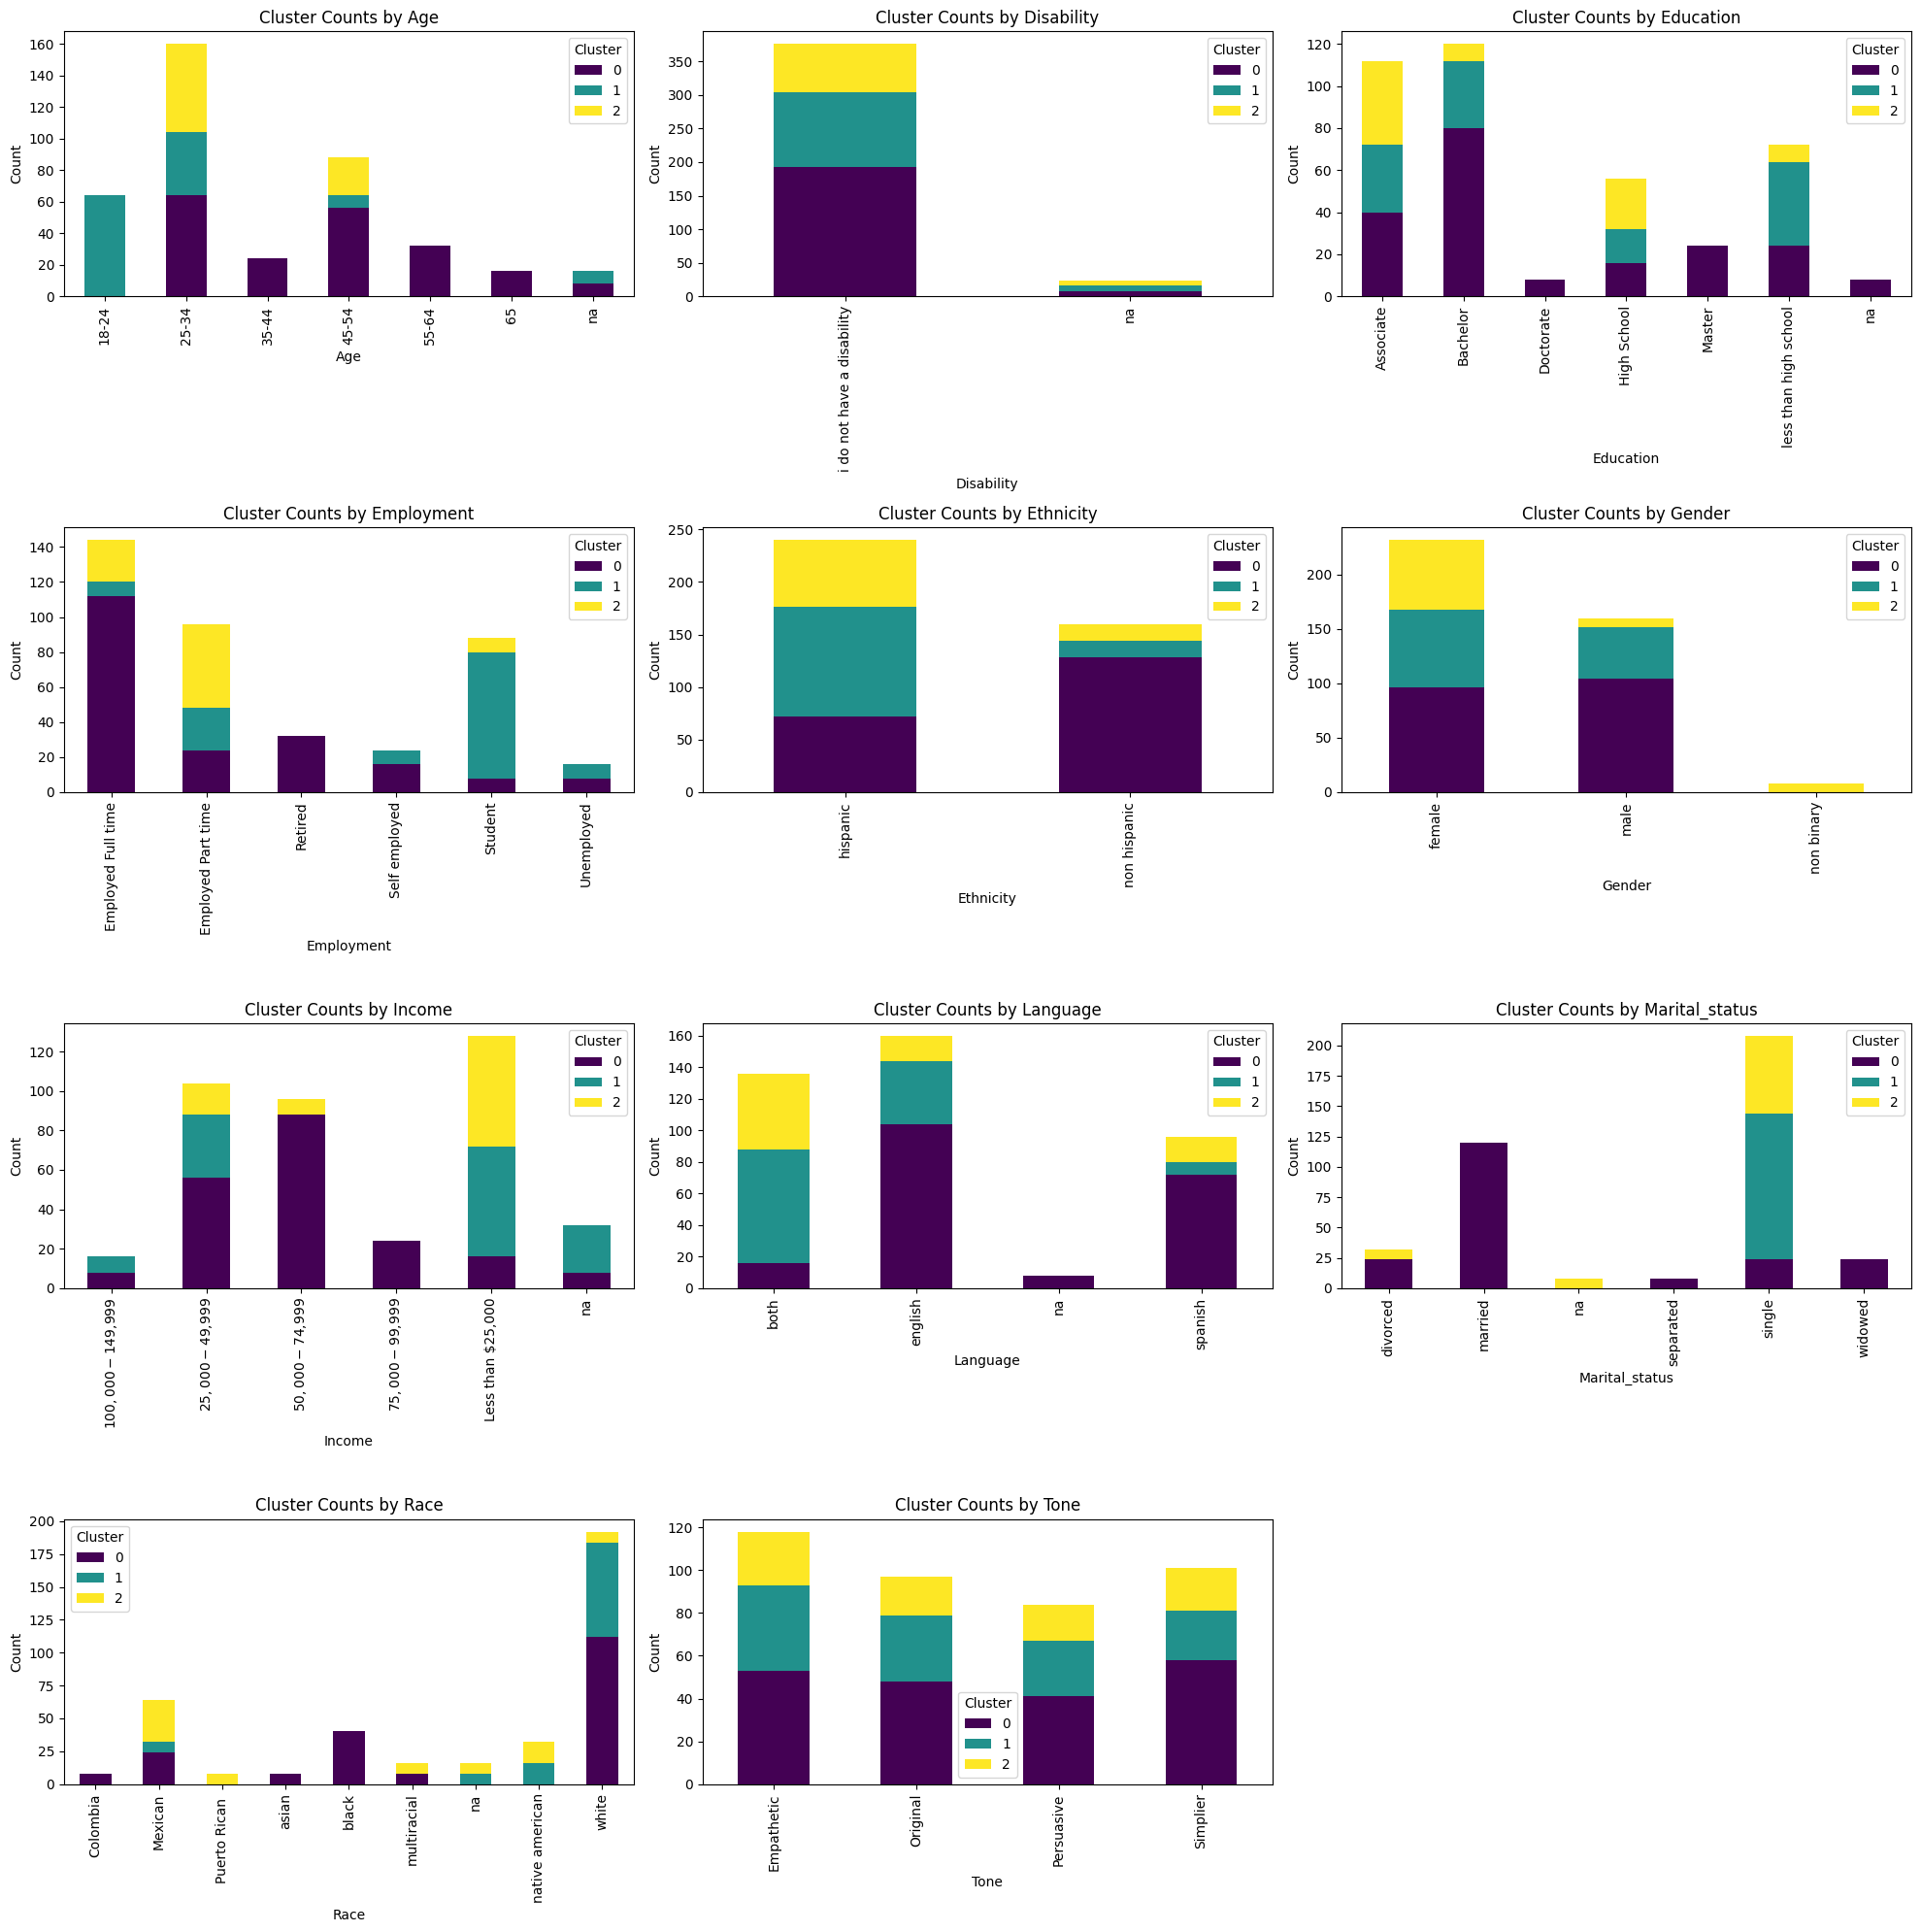

In [135]:
# Number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate stacked bar charts for each column
for idx, column in enumerate(columns_to_plot):
    # Aggregate data for the given column
    column_cluster_counts = umap_graphs.groupby([column, 'Cluster']).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart on the corresponding subplot
    ax = column_cluster_counts.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[idx])
    
    # Add labels and title
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Count')
    ax.set_title(f'Cluster Counts by {column.capitalize()}')
    ax.legend(title='Cluster')
    
    # Adjust layout for the subplot
    plt.tight_layout()

# Remove any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Show all plots
plt.show()

In [136]:
# umap_df.to_excel('../datasets/umap-dem-clusters.xlsx', index=False)